# Evaluación 2

---



**Autor:** Alessandra Arriagada, Matías Mora, Claudio Córdova

**Correo Electrónico:** al.arriagada@duocuc.cl | cl.cordova@duocuc.cl | ma.mora@duocuc.cl

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 2 de la asignatura electiva de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)
- random
- iblearn

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Fase 0 - Cargar de los datos

## Carga de datos

In [1]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

## Importación de librerias

In [2]:
# repertorio inicial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# estandarización de datos
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from collections import Counter

# Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, accuracy_score, classification_report, recall_score, f1_score
from sklearn.model_selection import cross_validate, cross_val_score

# Polynomial Regressor, Lasso
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import random

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# KNC
from sklearn.neighbors import KNeighborsClassifier

# SVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import seaborn as sb

## Carga de Data con pandas

In [3]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)

# Fase 1 - Comprensión del negocio

## 1.1 Introducción al negocio

Entregar las razones por las que fuimos contratados

La institución financiera "Monopoly FELIZ" ha decidido implementar el uso de aprendizaje automático en su negocio. Con este propósito, han decidido ponerse en contacto con nuestro equipo, para evaluar si con los datos almacenados por el banco se pueden crear modelos predictivos, y de ser el caso, que variables se pueden predecir con los datos que se poseen.

## 1.2 Alcance / Objetivos del proyecto

Definir los objetivos del proyecto

El objetivo general del proyecto es el desarrollo de un modelo predictivo el cual permita anticipar los comportamientos del actuar de los usuarios.

Los objetivos específicos del proyecto son...
- Realizar un análisis exploratorio para observar la naturaleza de los datos
- Definir cuales son las variables que pueden ser usadas para el desarrollo de un modelo predictivo (variable objetivo)
- Entender los datos de las variables definidas buscando nulos, incongruencias y atípicos
- Obtener medidas estadísticas de las dependenties e independientes
- Realizar una fase de testing donde se apliquen y se obtengan los estadísticos de cada técnica de tratamiento de nulos
- Analizar los resultados y definir cual es la mejor técnica de tratamiento de nulos
- Aplacar incongruencias dentro de la Data (duplicados, atípicos)
- Escalar la Data

## 1.3 Focos investigativos

El negocio requiere investigar sobre el comportamiento de los clientes, y, a partir de esto, crear un modelo predictivo el cual permita al negocio tener mayor certeza sobre acciones de sus usuarios. Para esto, se nos ha pedido inquirir sobre lo siguiente...

- Gasto en compras nacionales a través de los meses (cambio a meses criticos en caso de que no)
- Pago de la deuda relacionada a la tarjeta de credito

In [4]:
data_copia = data.copy()

In [5]:
data_copia

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0,33000,0,1099866,0,1099866,15080,0,R,0
1,2,160,H,13.0,46,143640,69,1,0,0,...,0,300000,0,214592,0,214592,83596,0,R,0
2,3,170,H,13.0,45,929106,24,1,1,0,...,0,216676,0,0,0,7400,0,0,T,0
3,4,151,H,13.0,46,172447,134,0,1,0,...,0,60000,0,272762,0,272762,10591,0,R,0
4,5,170,H,13.0,46,805250,116,0,1,1,...,0,272925,0,249562,0,75339,377782,0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978,57,1,1,1,...,0,300000,0,478320,0,478320,12668,0,R,0
51120,51121,170,H,13.0,51,625376,39,1,0,0,...,0,166098,0,166098,0,0,572363,0,R,0
51121,51122,160,H,13.0,47,806220,153,1,1,0,...,0,18891,0,9652,0,9652,16241,0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0,26528,0,24638,0,24638,84982,0,R,0


In [6]:
data_copia.CUPO_L2 = data_copia['CUPO_L2'].replace(',','.', regex=True).astype('float')
data_copia.CUPO_L2.describe()

count    5.112400e+04
mean     3.283759e+05
std      7.578185e+05
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      2.360292e+05
max      1.255000e+07
Name: CUPO_L2, dtype: float64

In [7]:
data_select = data[['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 
      'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 
      'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'target']]
data_select

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,target
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,0
1,2,160,H,13.0,46,143640,69,1,0,0,0,1,0,1,0,NaN,1,1,0
2,3,170,H,13.0,45,929106,24,1,1,0,0,1,0,1,1,1.0,1,2,0
3,4,151,H,13.0,46,172447,134,0,1,0,1,0,0,0,0,1.0,1,2,0
4,5,170,H,13.0,46,805250,116,0,1,1,0,1,0,1,0,1.0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978,57,1,1,1,0,1,0,0,1,1.0,2,3,0
51120,51121,170,H,13.0,51,625376,39,1,0,0,0,1,0,0,1,1.0,1,1,0
51121,51122,160,H,13.0,47,806220,153,1,1,0,0,1,0,0,1,1.0,1,2,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,0,1,0,0,0,NaN,1,1,0


In [8]:
# Tranformación de String / Object a Float
data_copia.Renta = data_copia['Renta'].replace(',','.', regex=True).astype('float')

In [9]:
data_copia.Renta.dtypes

dtype('float64')

In [10]:
data_copia.Renta

0             NaN
1        143640.0
2        929106.0
3        172447.0
4        805250.0
           ...   
51119    364978.0
51120    625376.0
51121    806220.0
51122         NaN
51123    840878.0
Name: Renta, Length: 51124, dtype: float64

In [11]:
data_copia[['Renta', 'target']][data_copia.Renta.isnull()]

,Renta,target
0,NaN,0
7,NaN,0
10,NaN,0
11,NaN,0
15,NaN,0
...,...,...
51085,NaN,0
51100,NaN,1
51111,NaN,0
51116,NaN,1


In [12]:
corr_data = data_copia.corr(numeric_only=True)
corr_data.Renta

Id             0.015980
Subsegmento    0.010060
Region        -0.007266
Edad           0.143001
Renta          1.000000
                 ...   
ColL2AC_T01    0.016796
ColL2CC_T01    0.053663
PagoNac_T01    0.095831
UsoL2_T01      0.035728
target        -0.013111
Name: Renta, Length: 444, dtype: float64

In [13]:
corr_data.Renta.sort_values(ascending = False)

Renta             1.000000
CUPO_L1           0.289283
Hipotecario       0.222307
Edad              0.143001
FacDebCom_T12     0.122906
                    ...   
FlgActCCPC_T05   -0.078395
FlgActCCPC_T08   -0.080484
FlgActCCPC_T09   -0.080523
FlgActCCPC_T07   -0.081190
CambioPin              NaN
Name: Renta, Length: 444, dtype: float64

In [14]:
corr_data.Edad.sort_values(ascending = False)

Edad            1.000000
Antiguedad      0.524487
CUPO_L1         0.443795
Id              0.332918
Monoproducto    0.243881
                  ...   
Ctacte         -0.244444
Debito         -0.363856
Internauta     -0.389240
Subsegmento    -0.519442
CambioPin            NaN
Name: Edad, Length: 444, dtype: float64

In [15]:
corr_data.Antiguedad.sort_values(ascending = False)

Antiguedad      1.000000
Edad            0.524487
CUPO_L1         0.522510
Adicional       0.284226
Monoproducto    0.230606
                  ...   
Internauta     -0.186996
Ctacte         -0.236351
Subsegmento    -0.271497
Debito         -0.367517
CambioPin            NaN
Name: Antiguedad, Length: 444, dtype: float64

In [16]:
corr_data.Region.sort_values(ascending = False)

Region           1.000000
Adicional        0.097302
TC               0.069545
FlgActPAT_T05    0.064742
FlgActPAT_T07    0.064577
                   ...   
TxsCCPC_T06     -0.032132
TxsCCPC_T05     -0.035676
Subsegmento     -0.047450
Ctacte          -0.047878
CambioPin             NaN
Name: Region, Length: 444, dtype: float64

In [17]:
data_copia.shape

(51124, 574)

NOTA PERSONAL

Al utilizar [] para hacer una cláusula Where, algo parece pasar con los nulos que no tengo particularmente claro.

De acuerdo a la referencia 1, podemos ver de que efectivamente hay registros donde "Edad" y "Antiguedad" presentan incongruencias.

In [18]:
# Referencia 1
data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad].reindex().iloc[0]

Edad           43
Antiguedad    130
Name: 0, dtype: int64

In [19]:
# Referencia 1
data_select[['Edad', 'Antiguedad']].iloc[3]

Edad           46
Antiguedad    134
Name: 3, dtype: int64

In [20]:
data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad].reindex()

,Edad,Antiguedad
0,43,130
1,46,69
3,46,134
4,46,116
5,47,67
...,...,...
51116,49,66
51117,50,62
51119,51,57
51121,47,153


In [21]:
data_select[['Edad', 'Antiguedad']].where(data.Antiguedad > data.Edad)

,Edad,Antiguedad
0,43.0,130.0
1,46.0,69.0
2,NaN,NaN
3,46.0,134.0
4,46.0,116.0
...,...,...
51119,51.0,57.0
51120,NaN,NaN
51121,47.0,153.0
51122,NaN,NaN


In [22]:
#incongruencia_edad = data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad]
incongruencia_edad = data_select[['Edad', 'Antiguedad']][data.Antiguedad > data.Edad]
count_incongruencias_edadantiguedad = len(incongruencia_edad)

txt = ("Hay un total de {:,} registros que presentan una incongruencia de mayor Antiguedad que Edad dentro de la Data")
print(txt.format(count_incongruencias_edadantiguedad))

Hay un total de 17,816 registros que presentan una incongruencia de mayor Antiguedad que Edad dentro de la Data


# Fase 2 - Comprensión de los datos

## 2.1 Análisis exploratorio inicial

Se busca entregar datos como
- Dimensiones de la data
- Existen Nulos
- Existencia de incongruencias en la data
- Razonamientos para los duplicados
    - Esto refiere al hecho de que al escoger una cantidad de columnas X, podemos hacer que 2 registros que se diferencian entre sí por una columna que no fue escogida, ahora sean exactamente iguales, lo cual puede dificultar el análisis de la data

### 2.1.1 Dimensiones de la data

In [23]:
row_data = data.shape[0]
column_data = data.shape[1]

print(f"La data presenta un total de {row_data} clientes y {column_data} características")

La data presenta un total de 51124 clientes y 574 características


### 2.1.2 Análisis de variables objetivo

## 2.2 Variable objetivo

De acuerdo al contexto de negocio, establecimos las siguientes características como las variables objetivo.

Para el caso de compras nacionales fue definido FacCN_T99, ya que este refleja el monto facturado por mes en compras nacionales. El poder predecir esta variable permitiría al negocio realizar convenios que incentiven el uso de sus tarjetas en meses donde se prediga una mayor cantidad de dinero.

Por otro lado, para el caso del "pago de la deuda de la tarjeta", la variable "target" fue definida para esto. Poder predecir esta variable permitirá al negocio saber cuales clientes son potenciales deudores.

Dentro de esta sección se puede ver todas las características relacionadas a los focos de investigación.

### 2.2.1 Variable 'Target'

In [24]:
# variable target
data.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Actualmente la característica 'target' es de tipo 'int64'.

In [25]:
data['target'].dtypes

dtype('int64')

La data no posee valores fuera del 0 y del 1

In [26]:
data['target'].unique()

array([0, 1])

### 2.2.2 Variable 'FacCN_T99'

Esta variable se encuentra compuesta de todos los meses del año, es decir, desde T01 (Enero) - T012 (Diciembre).

In [27]:
# Variable gasto compras nacionales
data.filter(regex='FacCN_T')

,FacCN_T12,FacCN_T11,FacCN_T10,FacCN_T09,FacCN_T08,FacCN_T07,FacCN_T06,FacCN_T05,FacCN_T04,FacCN_T03,FacCN_T02,FacCN_T01
0,55490,0,14630,26980.0,67434.0,115644.0,106045,0.0,0.0,0,0.0,0
1,19813,291725,100918,98584.0,231245.0,63589.0,0,27990.0,0.0,5678,14293.0,118247
2,123950,97474,6500,55290.0,667420.0,215061.0,59840,69822.0,133940.0,6650,57929.0,191336
3,44470,72416,23003,44990.0,43015.0,0.0,82462,22592.0,34458.0,27000,7990.0,11890
4,138225,526687,164532,488217.0,532414.0,158949.0,323687,312172.0,135979.0,237926,334904.0,173576
...,...,...,...,...,...,...,...,...,...,...,...,...
51119,78520,71470,21970,172086.0,74595.0,95750.0,86550,54910.0,24108.0,40080,44048.0,62808
51120,0,29745,0,0.0,0.0,0.0,986252,93203.0,0.0,275688,0.0,0
51121,66040,0,0,0.0,0.0,37900.0,0,40970.0,0.0,0,24259.0,0
51122,NaN,NaN,24500,25000.0,46100.0,48000.0,34700,18500.0,46000.0,25000,26000.0,108982


#### 2.2.2.1 Tipo de dato por característica

Se detectó de que algunos de estos meses fueron registrados dentro de la data con un tipo de dato que no correspondía, el cual es 'Object'.

In [28]:
data['FacCN_T12'].dtypes

dtype('O')

In [29]:
data['FacCN_T02'].dtypes

dtype('float64')

Aunque esto tendría que ser solucionado en la siguiente fase (preparación de datos), es imperativo que esto sea solucionado ahora para los cálculos de correlación (Sección 2.3). Para solucionar esto se obtendrán todas las columnas que poseen un tipo de dato el cual no sea 'float64', y se reemplazará su tipo por este.

In [30]:
data.filter(regex='FacCN_T').dtypes[data.filter(regex='FacCN_T').dtypes != 'float64']

FacCN_T12    object
FacCN_T11    object
FacCN_T10    object
FacCN_T06    object
FacCN_T03    object
FacCN_T01     int64
dtype: object

Se registran un total de 6 características de tipo no 'float64'

In [31]:
len(data.filter(regex='FacCN_T').columns[data.filter(regex='FacCN_T').dtypes != 'float64'])

6

In [32]:
# Cambio a tipo de dato float
for i in range(12): # range se deja como 12 en vez de buscar el número de columnas de FacCN ya que como regla de negocio se registran los meses del 1 al 12
    i = i + 1
    i = str(i).zfill(2)

    a = f'FacCN_T{i}'

    dtype = data[a].dtypes
    
    if dtype == 'float64':
        pass
    else:
        data[a] = data[a].replace(',','.', regex=True).astype('float')

Transformadas las características, comprobamos de que los cambios se hayan realizado

In [33]:
data.filter(regex='FacCN_T').dtypes[data.filter(regex='FacCN_T').dtypes != 'float64']

Series([], dtype: object)

#### 2.2.2.2 Reconocimiento de incrongruencias dentro de la variable

Dentro de las variables existe la posibilidad de que hayan valores negativos, lo cual sería una incongruencia considerando de que hablamos de monto gastado. Para detectar esto se buscarán dentro de cada columna valores negativos, se rescatarán estas columnas y se verá porcentualmente del total de la data de la columna cuantos valores son negativos.

##### Reconocimiento de meses con valores negativos

In [34]:
negFacCN_T01 = data.FacCN_T01[data.FacCN_T01 < 0]
negFacCN_T01

3318     -49990.0
11118    -13420.0
21249    -20000.0
30106    -49903.0
36862     -5510.0
38001   -119900.0
44241    -78500.0
Name: FacCN_T01, dtype: float64

In [35]:
negFacCN_T02 = data.FacCN_T02[data.FacCN_T02 < 0]
negFacCN_T02

10972    -23093.0
13416   -200000.0
13453   -337779.0
21738    -41384.0
29043    -15100.0
30580    -73270.0
30962    -48932.0
38721   -136789.0
46213   -107750.0
Name: FacCN_T02, dtype: float64

In [36]:
negFacCN_T03 = data.FacCN_T03[data.FacCN_T03 < 0]
negFacCN_T03 

16514   -103979.0
16779    -21900.0
40096    -92890.0
46255     -9990.0
47068    -33382.0
49946   -292344.0
Name: FacCN_T03, dtype: float64

In [37]:
negFacCN_T04 = data.FacCN_T04[data.FacCN_T04 < 0]
negFacCN_T04

170       -4873.0
15164     -5000.0
17687   -178883.0
24209     -4800.0
24533    -90190.0
30137   -233190.0
36908    -52410.0
Name: FacCN_T04, dtype: float64

In [38]:
negFacCN_T05 = data.FacCN_T05[data.FacCN_T05 < 0]
negFacCN_T05

1071      -8075.0
1805     -74180.0
5637      -8480.0
8266     -40620.0
8370      -2040.0
10175    -22480.0
16332    -31490.0
17849    -19900.0
21961   -890000.0
22781    -30970.0
23775     -9990.0
24209   -129920.0
25028     -4366.0
27231    -11990.0
27412   -181510.0
28356   -146810.0
29561    -30522.0
30225    -16090.0
46169     -2740.0
48947      -970.0
49450    -54890.0
Name: FacCN_T05, dtype: float64

In [39]:
negFacCN_T06 = data.FacCN_T06[data.FacCN_T06 < 0]
negFacCN_T06

2382     -29990.0
3280     -42160.0
3549     -39990.0
5285       -164.0
6952    -463480.0
8056    -179473.0
10065    -59990.0
10722    -10980.0
11685    -42410.0
12400    -32110.0
15880    -12570.0
20151    -44980.0
21711    -55540.0
21793   -273660.0
21930    -51990.0
25264    -31790.0
29184    -35641.0
29921   -246970.0
30090    -60692.0
31144    -28000.0
34026    -14000.0
41767    -14990.0
47950    -55790.0
Name: FacCN_T06, dtype: float64

In [40]:
negFacCN_T07 = data.FacCN_T07[data.FacCN_T07 < 0]
negFacCN_T07

4371    -156224.0
5149     -30000.0
5211     -21990.0
12152    -33990.0
16367     -3290.0
28938    -18970.0
36795   -188990.0
39483   -196366.0
Name: FacCN_T07, dtype: float64

In [41]:
negFacCN_T08 = data.FacCN_T08[data.FacCN_T08 < 0]
negFacCN_T08

915     -194587.0
957      -20900.0
3106      -5570.0
4897     -25000.0
5117     -10450.0
6256    -116036.0
6558        -30.0
10200    -22090.0
12698     -3070.0
15269    -41890.0
15549   -166984.0
16240    -14340.0
18906    -94861.0
20094    -71903.0
25851    -24277.0
32419    -42990.0
36974    -38455.0
37026    -25635.0
37993   -382370.0
38105   -162510.0
46721    -31133.0
49605   -142562.0
Name: FacCN_T08, dtype: float64

In [42]:
negFacCN_T09 = data.FacCN_T09[data.FacCN_T09 < 0]
negFacCN_T09

2816     -20000.0
9564     -72000.0
21524    -41890.0
24365   -152000.0
29650    -17090.0
Name: FacCN_T09, dtype: float64

In [43]:
negFacCN_T10 = data.FacCN_T10[data.FacCN_T10 < 0]
negFacCN_T10

6629     -24900.0
11013    -38712.0
17515    -66523.0
33377    -23259.0
45546   -186497.0
Name: FacCN_T10, dtype: float64

In [44]:
negFacCN_T11 = data.FacCN_T11[data.FacCN_T11 < 0]
negFacCN_T11

9305    -2418286.0
19837    -109700.0
25018    -140890.0
26123     -49990.0
28969    -107970.0
36957    -178450.0
Name: FacCN_T11, dtype: float64

In [45]:
negFacCN_T12 = data.FacCN_T12[data.FacCN_T12 < 0]
negFacCN_T12

1579     -39593.0
19589    -33251.0
21253    -39990.0
40294    -36280.0
45434   -480000.0
Name: FacCN_T12, dtype: float64

##### Revisión de valores negativos

In [46]:
total_negativos = 0

for i in range(1, 13):
    key = f'negFacCN_T{str(i).zfill(2)}'
    total_negativos += len(globals()[key])

print('Se encuentran un total de', total_negativos, 'valores negativos dentro del total de los meses')

Se encuentran un total de 124 valores negativos dentro del total de los meses


De acuerdo a lo revisado, se determinó que no es necesario hacer una transformación de datos para obtener la correlación de esta variable. La transformación pertinente para resolver esta incongruencia será efectuada en la Fase 3 del proyecto.

## 2.3 Matriz de correlación

Dentro de esta sección se determinarán cuales son las variables que más nos ayudarán a predecir lo definido en la sección anterior (2.2). Para determinar esto se hará una matriz de correlación, se analizará la correlación que tiene con otras variables y, de acuerdo a eso, se verá si es que es posible utilizar la variable en un modelo predictivo.

El primer paso para esto será crear una nueva característica la cual sea la suma de todas las columnas que representan meses para el monto facturado por mes.

In [47]:
corr_data = data.corr(numeric_only=True)
corr_data.head()

,Id,Subsegmento,Region,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,ColL1T0_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,PagoNac_T01,UsoL2_T01,target
Id,1.000000,0.054252,-0.013686,0.332918,0.145347,-0.155182,0.050817,-0.093430,0.084117,-0.077225,...,-0.100949,-0.070630,-0.094866,0.013054,-0.005226,-0.017572,-0.003318,0.000309,-0.017258,0.018496
Subsegmento,0.054252,1.000000,-0.047450,-0.519442,-0.271497,0.207811,-0.159026,-0.140818,-0.157122,0.160693,...,-0.006115,-0.045977,0.013761,-0.080953,-0.036608,-0.019625,-0.047635,-0.074260,-0.036433,-0.021646
Region,-0.013686,-0.047450,1.000000,0.010729,0.046028,0.054414,0.097302,0.014180,0.047502,-0.047878,...,0.053479,0.017807,0.032112,0.024356,-0.002210,0.023107,0.010010,0.017824,0.024365,-0.014621
Edad,0.332918,-0.519442,0.010729,1.000000,0.524487,-0.389240,0.235544,0.013080,0.243881,-0.244444,...,-0.080030,-0.027344,-0.112253,0.125522,0.026142,0.001501,0.034772,0.102946,0.016585,0.055389
Antiguedad,0.145347,-0.271497,0.046028,0.524487,1.000000,-0.186996,0.284226,-0.029773,0.230606,-0.236351,...,-0.012350,-0.021720,-0.054630,0.112794,0.003716,-0.012038,0.005907,0.105192,-0.006020,0.029404


### 2.3.1 Monto Facturado por mes

Para obtener la correlación de esta característica se decidió sumar cada uno de los meses en una nueva columna a través de la cual se obtendrán las mejores correlaciones para apoyar el modelo predictivo. La razón de esto es porque si analizamos la mejor correlación de cada característica uno por uno, se obtendrán características distintas para apoyar la predicción de cada mes, provocando así una elección engorrosa de variables para la predicción.

In [48]:
data.FacCN_T01.head()

0         0.0
1    118247.0
2    191336.0
3     11890.0
4    173576.0
Name: FacCN_T01, dtype: float64

In [49]:
data['columna_año'] = pd.Series(dtype='Int64')
columna_año = 0

for i in range(1, 13):
    columna_mes = data[f'FacCN_T{str(i).zfill(2)}']
    columna_año += columna_mes

data.columna_año = columna_año

In [50]:
data.columna_año

0         386223.0
1         972082.0
2        1685212.0
3         414286.0
4        3527268.0
           ...    
51119     826895.0
51120    1384888.0
51121     169169.0
51122          NaN
51123     139290.0
Name: columna_año, Length: 51124, dtype: float64

Se obtienen las correlaciones de acuerdo a 'columna_año'.

In [51]:
corr_data = data.corr(numeric_only=True)['columna_año']
corr_data

Id             0.013476
Subsegmento   -0.122252
Region         0.024784
Edad           0.171142
Antiguedad     0.164703
                 ...   
ColL2CC_T01    0.132180
PagoNac_T01    0.368336
UsoL2_T01      0.045749
target        -0.144088
columna_año    1.000000
Name: columna_año, Length: 448, dtype: float64

Se filtran las correlaciones para no mostrar aquellas que se utilizaron para crear columna_año y se ordena de mayor a menor las correlaciones para ver la mejor alternativa.

In [52]:
correlacion_filtrada = corr_data[~corr_data.index.str.startswith('FacCN_T')]
correlacion_filtrada.sort_values(ascending=False)

columna_año      1.000000
ColL1T0_T07      0.552336
ColL1T0_T06      0.542962
ColL1T0_T08      0.534789
ColL1T0_T09      0.529421
                   ...   
FlgActPAT_T09   -0.048628
Debito          -0.117760
Subsegmento     -0.122252
target          -0.144088
CambioPin             NaN
Name: columna_año, Length: 436, dtype: float64

INTERPRETACIÓN

De acuerdo a lo obtenido se concluye de que...
- El valor más bajo negativo es target, el cual llega a un 14%. Este valor es demasiado bajo para ser considerado para un modelo predictivo.
- El valor más alto es 'ColL1T0_T07', con un 55%.
- Desde 'ColL1T0_T05' a 'ColL1T0_T10' se puede ver una fuerte correlación con la variable objetivo. Es decir, en la medida que el credito rotativo sea mayor, mayor también será el gasto efectuado en compras nacionales.
- TxsCN T03, T04 y T06 poseen una fuerte correlación con la variable objetivo. Esto se debe a que en la medida que mayor sea la cantidad de transacciones nacionales efectuadas, mayor también será el gasto en compras nacionales.

De acuerdo al análisis se determinan las siguientes variables para los modelos predictivos.
- Desde 'ColL1T0_T05' a 'ColL1T0_T10'
- TxsCN T03, T04 y T06

### 2.3.2 Pago realizado de tarjeta de credito

Se descartan la columna "target" para evitar el calculo por si misma e "Id" por representar solo el valor identificador del cliente sin añadir mas contexto. Las correlaciones están ordenadas de mayor a menor.

In [53]:
correlaciones_target = data.corr(numeric_only=True)["target"].drop(labels=["target", "Id"])
correlaciones_target.sort_values(ascending=False)

Monoproducto    0.072106
ColL2CC_T06     0.066400
ColL2CC_T07     0.065430
ColL2CC_T08     0.062614
ColL2CC_T09     0.062305
                  ...   
FlgActCN_T04   -0.222971
FlgActCN_T01   -0.249027
FlgActCN_T03   -0.254062
FlgActCN_T02   -0.259991
CambioPin            NaN
Name: target, Length: 446, dtype: float64

A partir del cálculo, se puede concluir por su correlación negativa con la variables "FlgActCN_T99", que al poseer un mayor indice de actividad en compras nacionales, la posibilidad de que el cliente pague la deuda de su tarjeta de crédito, disminuye. En cambio, hay una positiva pero débil relación entre la posesión de más de una tarjeta de crédito y el pago de la deuda.

Las variables independientes escogidas concretamente son...
- "FlgActCN_T01", "FlgActCN_T02", "FlgActCN_T03"

## 2.4 Reconocimiento de nulos

In [54]:
total_nulos = data.isna().sum()[data.isna().sum() > 0].count()
print(f"La data presenta un total de {total_nulos} características que poseen valores nulos")

La data presenta un total de 511 características que poseen valores nulos


Pretende ir in depth en el reconocimiento
- De acuerdo a las variables definidas para trabajar, porcentaje de nulos
- Definir si pueden ser ocupadas para el proyecto

### 2.4.1 Nulos de variable Target

In [55]:
tar_nulos = data['target'].isnull().sum()
tar_porc = (data['target'].isnull().sum() / len(data)) * 100
print(f'Target posee {tar_nulos} valores nulos, representando el {tar_porc}% de los registros de la variable.')

Target posee 0 valores nulos, representando el 0.0% de los registros de la variable.


### 2.4.2 Nulos de variable FacCN_T99 

A partir del cálculo de valores nulos sobre los montos mensuales facturado en compras nacionales, se obtiene que para el mes de enero (T01) no se registran nulos. Sin embargo, desde febrero (T02) hasta diciembre (T12), se observa un aumento en la ausencia de valores y su porcentaje, respectivamente.

In [56]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FacCN_T01,0,0.00
FacCN_T02,12,0.02
FacCN_T03,10,0.02
FacCN_T04,19,0.04
FacCN_T05,25,0.05
FacCN_T06,43,0.08
FacCN_T07,833,1.63
FacCN_T08,2200,4.30
FacCN_T09,3800,7.43
FacCN_T10,5191,10.15


## 2.5 Reconocimiento de valores duplicados

Cada registro representa una persona, por tanto debería ser imposible que hayan duplicados dentro de la Data. Para comprobar esto se utilizarán 2 metodologías, la primera es buscar duplicados dentro de la Data en general; mientras que por otro lado la segunda dropeará la característica 'Id' y volverá a hacer el mismo procedimiento de la primera. Sabemos que es altamente improbable, pero no imposible, de que una persona tenga exactamente los mismos datos que otro, por tanto es crucial determinar, en caso de que pase, la cantidad de veces que pasa y como esto puede manchar la Data.

### 2.5.1 Metodología 1

In [57]:
duplicados = len(data[data.duplicated()])
print(f'La Data presenta {duplicados} valores duplicados con la primera metodología')

La Data presenta 0 valores duplicados con la primera metodología


### 2.5.2 Metodología 2

In [58]:
data_copia = data.copy()
data_copia.drop(['Id'], axis=1)
duplicados = len(data_copia[data_copia.duplicated()])
print(f'La Data presenta {duplicados} valores duplicados con la segunda metodología metodología')

La Data presenta 0 valores duplicados con la segunda metodología metodología


### 2.5.3 Conclusiones

De acuerdo a los resultados, se determina de que no existen valores duplicados dentro de la Data.

## 2.6 Análisis y captura de estadísticos previo a la transformación de datos

En la presente sección se verán el total de los estadísticos de cada variable objetivo, y se obtendrá un estadístico de cada uno (en caso de target, target; mientras que en el caso de las facturas de compras nacionales, los meses que se consideren pertinentes) para el testeo de nulos de la fase 3.

### 2.6.1 Variables Discretas

In [59]:
copia_target = data[['target']].copy()
copia_target['target'] = copia_target['target'].astype('object')

In [60]:
copia_target['target'].describe()

count     51124
unique        2
top           0
freq      46524
Name: target, dtype: int64

---
INTERPRETACIÓN

En 'count' se observa que no hay valores nulos respecto al total de 51.124 registros de clientes. Posee solo dos valores posibles, 0 y 1, representados en 'unique', de los cuales la moda (top) es 0 con una frecuencia (freq) de 46524 registros, por lo que se puede concluir que en su mayoría, los usuarios de la tarjeta de crédito no pagan la deuda de esta.

---

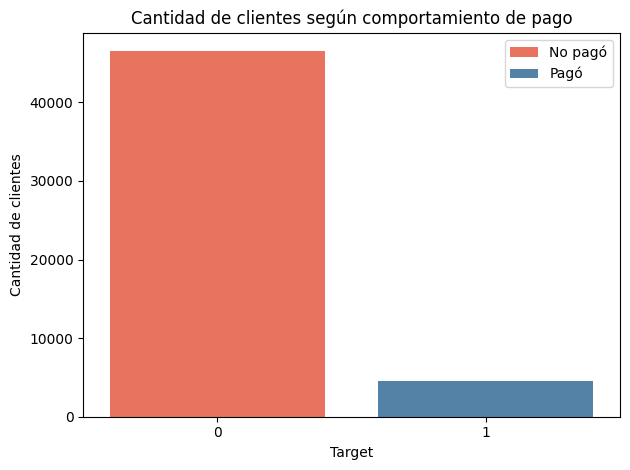

In [61]:
sb.countplot(x='target', data=data[data['target'] == 0], color='tomato', label='No pagó')
sb.countplot(x='target', data=data[data['target'] == 1], color='steelblue', label='Pagó')

plt.title('Cantidad de clientes según comportamiento de pago')
plt.xlabel('Target')
plt.ylabel('Cantidad de clientes')
plt.legend()
plt.tight_layout()
plt.show()

El gráfico de barras permite visualizar la diferencia significativa entre la cantidad de clientes que no pagaron la deuda de su tarjeta de crédito, representados como un 0 en los datos, y aquellos que no poseen deudas impagas, representados por 1. Aquellos que poseen deudas superan los 40.000 registros a diferencia de los menos de 10000 que pagaron.

Se guardan en una variable la data de la característica 'target'

In [62]:
testing_target = data.target.describe()
testing_target

count    51124.000000
mean         0.089977
std          0.286152
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

### 2.6.2 Variables Continuas

En esta sección se verán todas las variables cuantitativas, y la variable recogida de Testing

In [63]:
round(data[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']].describe(), 2)

,FacCN_T01,FacCN_T02,FacCN_T03,FacCN_T04,FacCN_T05,FacCN_T06
count,51124.00,51112.00,51114.00,51105.00,51099.00,51081.00
mean,59206.37,65898.87,69348.12,65839.53,55256.13,63242.97
std,117558.71,125795.67,133279.08,120221.00,105818.76,120130.93
min,-119900.00,-337779.00,-292344.00,-233190.00,-890000.00,-463480.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,16456.50,22442.50,24990.00,23000.00,16000.00,20000.00
75%,73468.50,83144.75,88568.00,83970.00,69580.00,78402.00
max,2820920.00,5900000.00,9340500.00,4219445.00,2903625.00,3874900.00


In [64]:
round(data[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']].describe(), 2)

,FacCN_T07,FacCN_T08,FacCN_T09,FacCN_T10,FacCN_T11,FacCN_T12
count,50291.00,48924.00,47324.00,45933.00,44492.00,42873.00
mean,68095.11,57575.68,59255.38,55258.21,57640.97,56870.99
std,117971.24,109050.15,114095.04,109221.68,110645.48,110457.00
min,-196366.00,-382370.00,-152000.00,-186497.00,-2418286.00,-480000.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,27603.00,18009.00,19400.00,14990.00,18200.00,15500.00
75%,89302.50,71874.00,74310.00,66363.00,71400.00,71148.00
max,3308662.00,2364120.00,4057749.00,2861687.00,2367085.00,3000000.00


--- 
INTERPRETACIÓN

En 'count' se observa la presencia de valores nulos respecto al total de registros correspondientes a 51.124 registros para todas las variables, exceptuando FacCN_T01. En 'mean' se aprecian valores de promedio que varían entre 55.256 CLP a 69.348 CLP. En 'min' se obtienen montos mínimos negativos, indicando la existencia de incongruencias las cuales serán tratadas en la siguiente fase (3.1).

Cada cuartil se ve representado por su valor porcental (Q1 = 25%, Q2 = 50%, y así). En el primero se puede analizar de que del total de meses del año, en un cuarto de este (3 meses) no se realizan gastos en compras nacionales. 

Por otro lado, en 6 meses del total del año (Q2) se facturaron compras que varían entre los 15.500 CLP a 27.603 CLP. 

Ya hasta los 9 meses dentro del año (Q3) se facturaron compras que van desde los 66.363 CLP hasta los 89.303 CLP.

Los máximos montos facturados se encuentran entre los 2.364.120 CLP y 9.340.500 CLP.

---

Para el proceso de Testing, se decidió utilizar el mes 2 (T02) Y el mes 12 (T12). La razón de esto es porque se busca comparar los meses que poseen la cantidad mínima y máxima de nulos.

In [65]:
testing_Fac = data[['FacCN_T02','FacCN_T12']].describe()
testing_Fac

,FacCN_T02,FacCN_T12
count,5.111200e+04,4.287300e+04
mean,6.589887e+04,5.687099e+04
std,1.257957e+05,1.104570e+05
min,-3.377790e+05,-4.800000e+05
25%,0.000000e+00,0.000000e+00
50%,2.244250e+04,1.550000e+04
75%,8.314475e+04,7.114800e+04
max,5.900000e+06,3.000000e+06


## 2.7 Reconocimiento de atípicos

Reconocer cantida de atípicos tanto en su número como en su porcentaje dentro de las variables a tratar.

In [66]:
def buscar_atipicos(data : pd.DataFrame, columna : str):
  # Calcular los límites
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  # Calcula rango intercuartilico
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrar outliers
  return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

### 2.7.1 FacCN_T01

#### 2.7.1.1 Mes 1

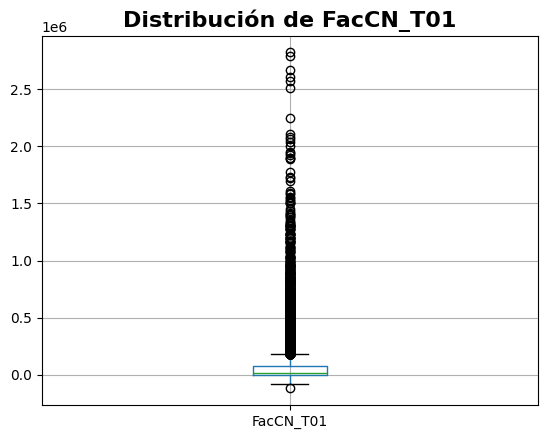

In [67]:
data.boxplot(column="FacCN_T01")
plt.title("Distribución de FacCN_T01", fontsize=16, fontweight="bold")
plt.show()

In [68]:
outliers = buscar_atipicos(data, 'FacCN_T01')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T01), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T01) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4235 Outliers de un total de 51124 registros
Estos representan un total de 8.28% del total de registros


#### 2.7.1.2 Mes 2

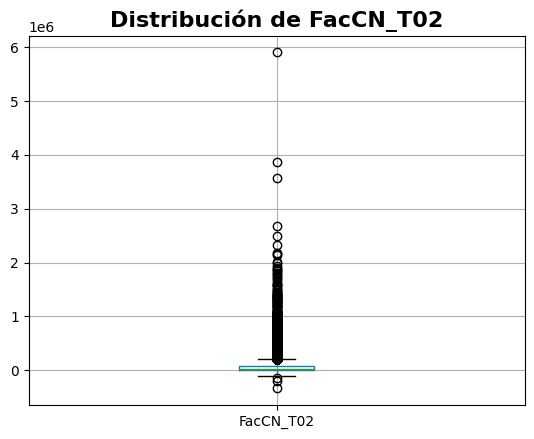

In [69]:
data.boxplot(column="FacCN_T02")
plt.title("Distribución de FacCN_T02", fontsize=16, fontweight="bold")
plt.show()

In [70]:
outliers = buscar_atipicos(data, 'FacCN_T02')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T02), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T02) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4058 Outliers de un total de 51124 registros
Estos representan un total de 7.94% del total de registros


#### 2.7.1.3 Mes 3

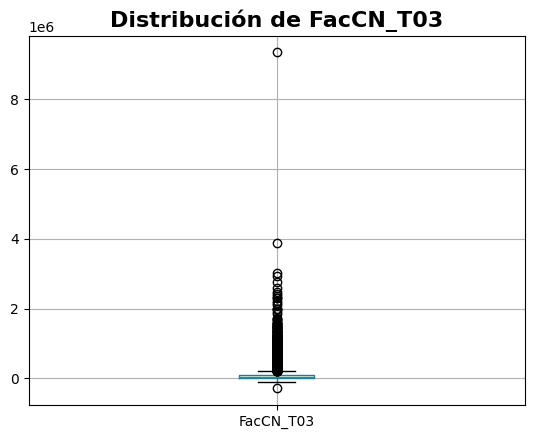

In [71]:
data.boxplot(column="FacCN_T03")
plt.title("Distribución de FacCN_T03", fontsize=16, fontweight="bold")
plt.show()

In [72]:
outliers = buscar_atipicos(data, 'FacCN_T03')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T03), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T03) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3863 Outliers de un total de 51124 registros
Estos representan un total de 7.56% del total de registros


#### 2.7.1.4 Mes 4

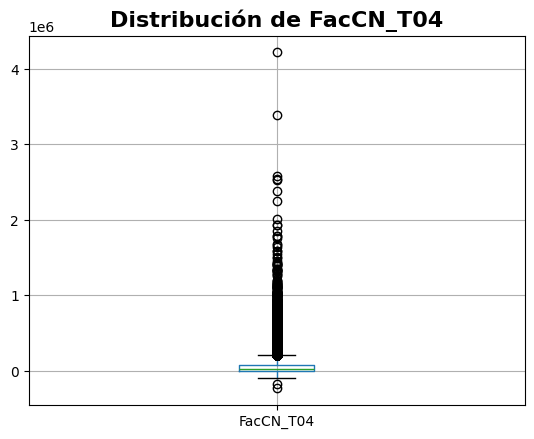

In [73]:
data.boxplot(column="FacCN_T04")
plt.title("Distribución de FacCN_T04", fontsize=16, fontweight="bold")
plt.show()

In [74]:
outliers = buscar_atipicos(data, 'FacCN_T04')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T04), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T04) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3959 Outliers de un total de 51124 registros
Estos representan un total de 7.74% del total de registros


#### 2.7.1.5 Mes 5

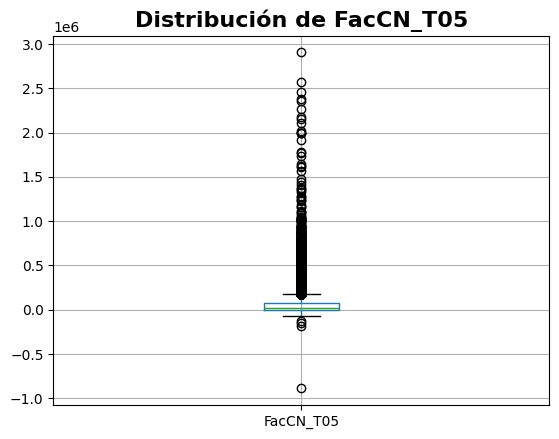

In [75]:
data.boxplot(column="FacCN_T05")
plt.title("Distribución de FacCN_T05", fontsize=16, fontweight="bold")
plt.show()

In [76]:
outliers = buscar_atipicos(data, 'FacCN_T05')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T05), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T05) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4316 Outliers de un total de 51124 registros
Estos representan un total de 8.44% del total de registros


#### 2.7.1.6 Mes 6

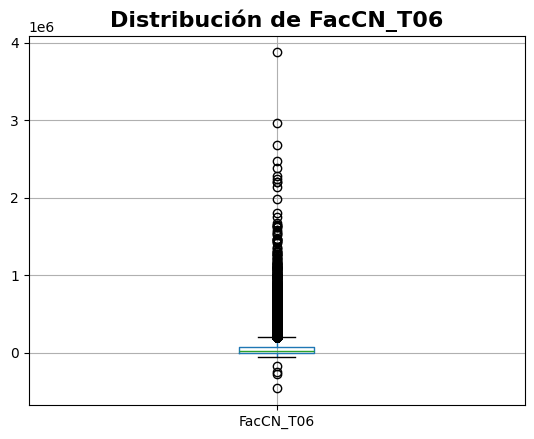

In [77]:
data.boxplot(column="FacCN_T06")
plt.title("Distribución de FacCN_T06", fontsize=16, fontweight="bold")
plt.show()

In [78]:
outliers = buscar_atipicos(data, 'FacCN_T06')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T06), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T06) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4328 Outliers de un total de 51124 registros
Estos representan un total de 8.47% del total de registros


#### 2.7.1.7 Mes 7

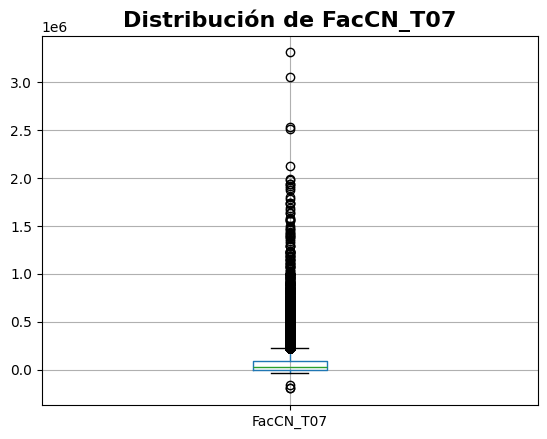

In [79]:
data.boxplot(column="FacCN_T07")
plt.title("Distribución de FacCN_T07", fontsize=16, fontweight="bold")
plt.show()

In [80]:
outliers = buscar_atipicos(data, 'FacCN_T07')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T07), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T07) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3651 Outliers de un total de 51124 registros
Estos representan un total de 7.14% del total de registros


#### 2.7.1.8 Mes 8

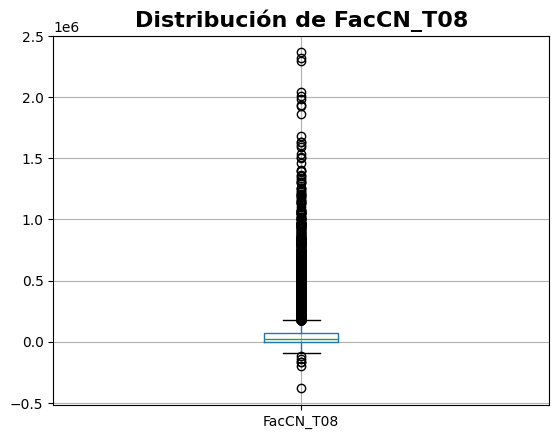

In [81]:
data.boxplot(column="FacCN_T08")
plt.title("Distribución de FacCN_T08", fontsize=16, fontweight="bold")
plt.show()

In [82]:
outliers = buscar_atipicos(data, 'FacCN_T08')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T08), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T08) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4034 Outliers de un total de 51124 registros
Estos representan un total de 7.89% del total de registros


#### 2.7.1.9 Mes 9

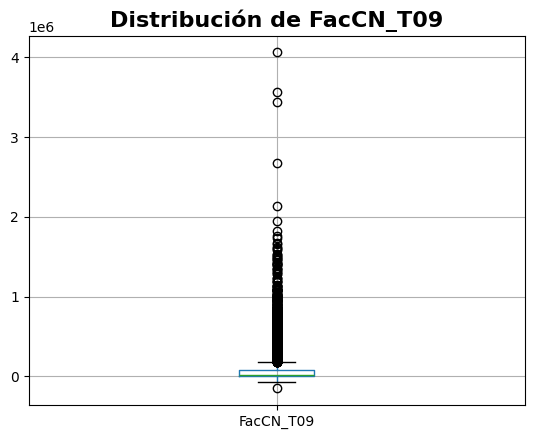

In [83]:
data.boxplot(column="FacCN_T09")
plt.title("Distribución de FacCN_T09", fontsize=16, fontweight="bold")
plt.show()

In [84]:
outliers = buscar_atipicos(data, 'FacCN_T09')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T09), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T09) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3825 Outliers de un total de 51124 registros
Estos representan un total de 7.48% del total de registros


#### 2.7.1.10 Mes 10

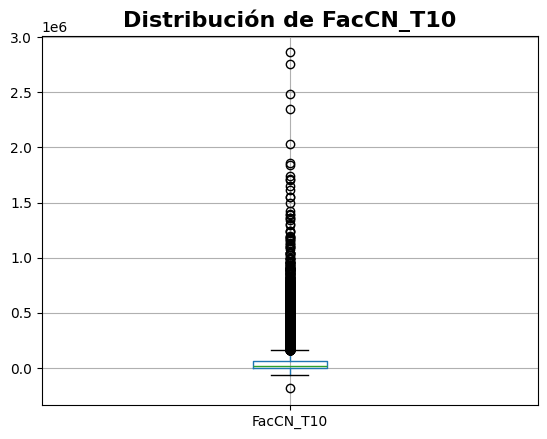

In [85]:
data.boxplot(column="FacCN_T10")
plt.title("Distribución de FacCN_T10", fontsize=16, fontweight="bold")
plt.show()

In [86]:
outliers = buscar_atipicos(data, 'FacCN_T10')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T10), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T10) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 4039 Outliers de un total de 51124 registros
Estos representan un total de 7.9% del total de registros


#### 2.7.1.11 Mes 11

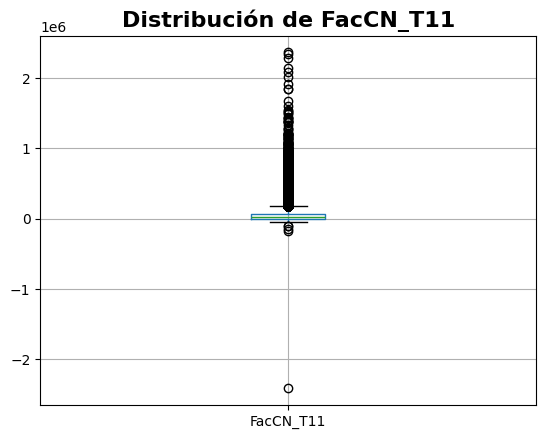

In [87]:
data.boxplot(column="FacCN_T11")
plt.title("Distribución de FacCN_T11", fontsize=16, fontweight="bold")
plt.show()

In [88]:
outliers = buscar_atipicos(data, 'FacCN_T11')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T01), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T11) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3745 Outliers de un total de 51124 registros
Estos representan un total de 7.33% del total de registros


#### 2.7.1.12 Mes 12

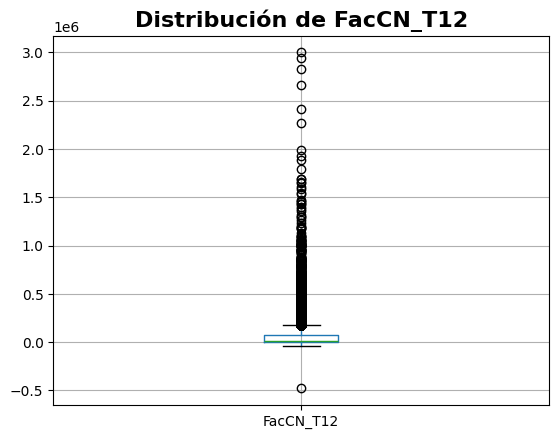

In [89]:
data.boxplot(column="FacCN_T12")
plt.title("Distribución de FacCN_T12", fontsize=16, fontweight="bold")
plt.show()

In [90]:
outliers = buscar_atipicos(data, 'FacCN_T12')
#outliers.FacCN_T01

print('Hay un total de', len(outliers.FacCN_T12), 'Outliers de un total de', data.shape[0],'registros')
print(f'Estos representan un total de {round((len(outliers.FacCN_T12) * 100) / data.shape[0], 2)}% del total de registros')

Hay un total de 3681 Outliers de un total de 51124 registros
Estos representan un total de 7.2% del total de registros


# Fase 3 - Preparación de datos

## 3.1 Tratamiento de valores negativos

En la sección 2.6 se pudo ver la existencia de valores negativos. Esta fase localizará, verá porcentualmente su cantidad y tratará estos registros con valores negativos.

In [91]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_neg = (data[facCN_cols] < 0).sum()
porc_neg = round((cant_neg / len(data)) * 100, 2)

neg_df = pd.DataFrame({'Negativos': cant_neg, 'Porcentaje (%)': porc_neg})
neg_df

,Negativos,Porcentaje (%)
FacCN_T01,7,0.01
FacCN_T02,9,0.02
FacCN_T03,6,0.01
FacCN_T04,7,0.01
FacCN_T05,21,0.04
FacCN_T06,23,0.04
FacCN_T07,8,0.02
FacCN_T08,22,0.04
FacCN_T09,5,0.01
FacCN_T10,5,0.01


Una vez identificados los valores negativos, se procede a tratarlos.

In [92]:
for i in range(1, 13):
    data[f'FacCN_T{str(i).zfill(2)}'] = data[f'FacCN_T{str(i).zfill(2)}'].mask(data[f'FacCN_T{str(i).zfill(2)}'] < 0, np.nan)

Una vez hecho, se comprueba que efectivamente los cambios fueron realizados, procediendo a el resto del proyecto.

In [93]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_neg = (data[facCN_cols] < 0).sum()
porc_neg = round((cant_neg / len(data)) * 100, 2)

neg_df = pd.DataFrame({'Negativos': cant_neg, 'Porcentaje (%)': porc_neg})
neg_df

,Negativos,Porcentaje (%)
FacCN_T01,0,0.0
FacCN_T02,0,0.0
FacCN_T03,0,0.0
FacCN_T04,0,0.0
FacCN_T05,0,0.0
FacCN_T06,0,0.0
FacCN_T07,0,0.0
FacCN_T08,0,0.0
FacCN_T09,0,0.0
FacCN_T10,0,0.0


### 3.2 Tratamiento de atípicos

Para el tratamiento de atípicos se optó por nulificar estos valores. Se tomó esta decisión porque se busca resolver todas las problemáticas de la data en el tratamiento de nulos, ergo se necesita de que al llegar a la fase de tratamiento de nulos (3.3), la data se encuentre en el mejor estado posible.

In [94]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FacCN_T01,7,0.01
FacCN_T02,21,0.04
FacCN_T03,16,0.03
FacCN_T04,26,0.05
FacCN_T05,46,0.09
FacCN_T06,66,0.13
FacCN_T07,841,1.65
FacCN_T08,2222,4.35
FacCN_T09,3805,7.44
FacCN_T10,5196,10.16


In [95]:
for i in range(1, 13):
    outliers = buscar_atipicos(data, f'FacCN_T{str(i).zfill(2)}')
    print(len(outliers[f'FacCN_T{str(i).zfill(2)}']))
    for n in range(len(outliers[f'FacCN_T{str(i).zfill(2)}'])):
        num_indice_atipico = outliers[f'FacCN_T{str(i).zfill(2)}'].index[n]
        data.loc[num_indice_atipico, f'FacCN_T{str(i).zfill(2)}'] = np.nan
        

#print('Hay un total de', len(outliers.FacCN_T01), 'Outliers de un total de', data.shape[0],'registros')
#print(f'Estos representan un total de {round((len(outliers.FacCN_T01) * 100) / data.shape[0], 2)}% del total de registros')

4234
4054
3862
3957
4306
4320
3647
4024
3824
4033
3740
3680


In [96]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FacCN_T01,4241,8.30
FacCN_T02,4075,7.97
FacCN_T03,3878,7.59
FacCN_T04,3983,7.79
FacCN_T05,4352,8.51
FacCN_T06,4386,8.58
FacCN_T07,4488,8.78
FacCN_T08,6246,12.22
FacCN_T09,7629,14.92
FacCN_T10,9229,18.05


## 3.3 Tratamiento de nulos

Para el tratamiento de nulos se analizará la posibilidad de aplicar la metodología de tratamiento, el impacto de todos los posibles tratamientos, y de acuerdo a los resultados entregados se escogerá la mejor metodología de tratamiento de nulos.

### 3.3.1 Plan de tratamiento de nulos

Para el tratamiento de nulos, se analizará cada una de las técnicas de tratamiento de nulos y se obtendrán los estadísticos resultantes de cada una de estas. Las metodologías a aplicar son...
- Eliminación / Invalidación
- Inputación
  - Valores estadísticos
  - KNNInputer
  

Del análisis de la sección de Reconocimiento de nulos 2.4 se observó de que la variable 'target' no presentaba nulos, sin embargo la mayoría de meses de la variable 'FacCN_T99' sí presentan nulos. Estos abarcan desde el mes 2 (FacCN_T02) hasta el mes 12 (FacCN_T12).

### 3.3.2 Testing de resultados del tratamiento de nulos

En esta sección se encuentran contenidas todas las metodologías de tratamiento de nulos utilizadas para el tratamiento.

#### 3.3.2.1 Eliminación / Invalidación

Esta técnica apunta a eliminar los registros que posean nulos. Aunque esta metodología algunos la consideren correcta, no será utilizada dentro del desarrollo de este proyecto puesto que se prioriza mantener los datos lo menos intervenido posibles. En cambio lo que se hará es clasificar aquellos registros que posean nulos e "invalidarlos" para así no ser considerados dentro del análisis de la Data.

##### 3.3.2.1.1 Preparación de la Data para invalidación

Con el propósito de hacer esto primero crearemos una copia de la Data real para no realizar cambios que puedan afectar a la Data.

In [97]:
data_invalidacion = data.copy()

In [98]:
data_invalidacion.head()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,columna_año
0,1,160,M,13.0,43,NaN,130,1,1,0,...,33000,0,1099866,0,1099866,15080,0,R,0,386223.0
1,2,160,H,13.0,46,143640,69,1,0,0,...,300000,0,214592,0,214592,83596,0,R,0,972082.0
2,3,170,H,13.0,45,929106,24,1,1,0,...,216676,0,0,0,7400,0,0,T,0,1685212.0
3,4,151,H,13.0,46,172447,134,0,1,0,...,60000,0,272762,0,272762,10591,0,R,0,414286.0
4,5,170,H,13.0,46,805250,116,0,1,1,...,272925,0,249562,0,75339,377782,0,R,0,3527268.0


Después crearemos una nueva columna llamada 'registro_invalido' la cual será llenada con 'False'. Esto busca que, cuando recorramos cada una de las columnas de 'FacCN_T99', podamos cambiar cuantas veces sea necesario un registro a 'True' cuando encuentre un nulo.

In [99]:
data_invalidacion['registro_invalido'] = False
data_invalidacion.registro_invalido

0        False
1        False
2        False
3        False
4        False
         ...  
51119    False
51120    False
51121    False
51122    False
51123    False
Name: registro_invalido, Length: 51124, dtype: bool

Para comprobar de que la sentencia se encuentre ejecutada de buena manera se obtuvo los índices de los registros que poseían valores nulos. Como referencia, el primer valor nulo del mes 02 es el 9343, por tanto este se tomará como comprobante para validar de que se hizo de manera correcta la transformación de 'registro_invalido'.

In [100]:
# En caso de querer comprobar los indices de los registros nulos, descomente el codigo
'''
for n in range(1, 13):
    print('---')
    print(f'mes número {str(n).zfill(2)}')
    print('-')
    
    for i in range(data.shape[0]):
        if data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna()[i] == True:
            print(data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna().index[i])
        else:
            pass
'''

"\nfor n in range(1, 13):\n    print('---')\n    print(f'mes número {str(n).zfill(2)}')\n    print('-')\n\n    for i in range(data.shape[0]):\n        if data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna()[i] == True:\n            print(data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna().index[i])\n        else:\n            pass\n"

Una vez se valida de que los registros mantienen cierta coherencia con lo explorado en la Data, procedemos a cambiar los valores de la columna 'registro_invalido' a los valores correspondientes.

In [101]:
print('Inicio de procesamiento de datos')
for n in range(1, 13):
    print(f'mes número {str(n).zfill(2)} OK')
    for i in range(data.shape[0]):
        if data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna()[i] == True:
            num_indice_nulo = data_invalidacion[f'FacCN_T{str(n).zfill(2)}'].isna().index[i]
            data_invalidacion.loc[num_indice_nulo, 'registro_invalido'] = True
        else:
            pass
print('Procesamiento de data finalizado')

Inicio de procesamiento de datos
mes número 01 OK
mes número 02 OK
mes número 03 OK
mes número 04 OK
mes número 05 OK
mes número 06 OK
mes número 07 OK
mes número 08 OK
mes número 09 OK
mes número 10 OK
mes número 11 OK
mes número 12 OK
Procesamiento de data finalizado


Se comprueba de que la tabla realmente posea registros con valores 'True'.

In [102]:
data_invalidacion[['registro_invalido']][data_invalidacion.registro_invalido == True]

,registro_invalido
1,True
2,True
4,True
6,True
10,True
...,...
51115,True
51116,True
51117,True
51120,True


Se corrobora lo establecido, el registro 9343 posee un valor 'True', por tanto no se considera de que hayan problemas con esta trasnformación.

In [103]:
data_invalidacion['registro_invalido'].iloc[9343]

np.True_

##### 3.3.2.1.2 Obtención de estadísticos de Data Nulificada

Se obtienen y guardan los estadísticos del 2do y 12vo mes de acuerdo a lo establecido en la fase 2.6. Además se muestra como referencia los estadístico de todos los meses.

In [104]:
# Guarda datos estadísticos del mes 2 y 12
data_inv_2do12vo = round(data_invalidacion[['FacCN_T02', 'FacCN_T12']][data_invalidacion['registro_invalido'] == False].describe(), 2)
# Periodo del 1er al 6to mes
round(data_invalidacion[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']][data_invalidacion['registro_invalido'] == False].describe(), 2)

,FacCN_T01,FacCN_T02,FacCN_T03,FacCN_T04,FacCN_T05,FacCN_T06
count,22472.00,22472.00,22472.00,22472.00,22472.00,22472.00
mean,29168.36,33552.27,36112.28,34812.26,27662.83,31319.29
std,40730.33,45149.62,47810.15,45824.55,38407.88,42432.47
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,8700.00,13562.00,15968.00,15421.00,9590.00,12990.00
75%,46871.25,52970.00,56975.50,55000.00,43796.25,49205.00
max,183629.00,207840.00,221123.00,209820.00,173990.00,196093.00


In [105]:
# Periodo del 7mo al 12vo mes
round(data_invalidacion[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']][data_invalidacion['registro_invalido'] == False].describe(), 2)

,FacCN_T07,FacCN_T08,FacCN_T09,FacCN_T10,FacCN_T11,FacCN_T12
count,22472.00,22472.00,22472.00,22472.00,22472.00,22472.00
mean,39094.19,29857.70,31310.73,26790.30,30204.19,28869.86
std,48429.83,39264.11,40745.25,36405.43,39593.34,39615.65
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,21303.50,13000.00,14511.50,9990.00,13660.00,9743.00
75%,61163.50,47671.25,50000.00,43090.25,48500.00,46424.25
max,223080.00,179490.00,185756.00,165946.00,178404.00,177705.00


#### 3.3.2.2 Inputación

Esta sección, a diferencia de la anterior, busca 'Inputar' valores dentro de los nulos para intentar dañar lo menos posible la Data. Dentro del proyecto se estableció 2 formas de hacer esto, esto es, a través de los 'Estadísticos', o a través del 'KNNInputer'.

##### 3.3.2.2.1 Estadísticos

Debido a la presencia de valores atípicos en la data, los valores serán imputados por la mediana de cada columna.

Se crea una copia del DataFrame para probar el método sin afectar a los datos reales.


In [106]:
median_copia = data.copy()

Se obtienen los valores de la mediana para cada columna y luego se reemplazan, fila por fila, los datos nulos.


In [107]:
median = round(median_copia[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]].median(), 2)

for i in range(1, 13):
    cols = median_copia[f'FacCN_T{str(i).zfill(2)}']
    median_copia[f'FacCN_T{str(i).zfill(2)}'] = cols.fillna(median.iloc[i-1])

In [108]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = median_copia[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(median_copia)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FacCN_T01,0,0.0
FacCN_T02,0,0.0
FacCN_T03,0,0.0
FacCN_T04,0,0.0
FacCN_T05,0,0.0
FacCN_T06,0,0.0
FacCN_T07,0,0.0
FacCN_T08,0,0.0
FacCN_T09,0,0.0
FacCN_T10,0,0.0


In [109]:
# Se guardan los valores del mes 02 y del mes 12
data_median_2vo12vo = round(median_copia[['FacCN_T02', 'FacCN_T12']].describe(), 2)

Se visualiza los estadísticos de cada uno de los meses para mantener de referencia.

In [110]:
round(median_copia[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']].describe(), 2)

,FacCN_T01,FacCN_T02,FacCN_T03,FacCN_T04,FacCN_T05,FacCN_T06
count,51124.00,51124.00,51124.00,51124.00,51124.00,51124.00
mean,31432.55,37225.99,40639.49,38010.71,29558.46,34113.08
std,44294.16,49699.68,53122.34,50122.29,41474.10,46379.05
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,9658.00,15546.00,18440.00,16590.00,9974.50,13990.00
75%,49900.00,57970.00,63785.75,59717.25,45970.00,52685.50
max,183670.00,207863.00,221402.00,209916.00,174013.00,196125.00


In [111]:
round(median_copia[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']].describe(), 2)

,FacCN_T07,FacCN_T08,FacCN_T09,FacCN_T10,FacCN_T11,FacCN_T12
count,51124.00,51124.00,51124.00,51124.00,51124.00,51124.00
mean,41712.07,30423.29,31155.16,25606.76,28294.13,26271.68
std,52742.10,42145.01,42773.47,37833.09,40044.40,39658.06
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,21153.00,11485.00,12949.00,7826.00,11174.50,8164.00
75%,64880.00,46180.00,46384.00,37547.50,40195.75,36000.00
max,223272.00,179748.00,185758.00,165950.00,178490.00,177804.00


##### 3.3.2.2.2 KNNInputer

Como segunda opción, se utiliza el algoritmo 'K-Nearest Neighbors' de la biblioteca 'scikit-learn' para reemplazar los valores nulos.

Se crea una copia del DataFrame para probar el método sin afectar a los datos reales.

In [112]:
knn_copia = data.copy()

Se crea el objeto de K-Nearest Neighbors, considerando los dos vecinos más cercanos con el mismo peso en el cálculo del valor imputado.

In [113]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

El algoritmo de K-Nearest Neighbors reemplaza los valores nulos de cada columna FacCN_T99, fila a fila, por valores obtenidos desde registros similares al que se encuentra en tratamiento.

In [114]:
knn_copia[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]] = knn_imputer.fit_transform(knn_copia[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]])

Se visualiza si los nulos fueron tratados dentro de la Data

In [115]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = knn_copia[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(knn_copia)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FacCN_T01,0,0.0
FacCN_T02,0,0.0
FacCN_T03,0,0.0
FacCN_T04,0,0.0
FacCN_T05,0,0.0
FacCN_T06,0,0.0
FacCN_T07,0,0.0
FacCN_T08,0,0.0
FacCN_T09,0,0.0
FacCN_T10,0,0.0


Se visualiza el total de los meses y se guarda los meses 02 y 12.

In [116]:
data_knn_2do12vo = round(knn_copia[['FacCN_T02', 'FacCN_T12']].describe(), 2)
round(knn_copia[['FacCN_T01', 'FacCN_T02', 'FacCN_T03', 'FacCN_T04', 'FacCN_T05', 'FacCN_T06']].describe(), 2)

,FacCN_T01,FacCN_T02,FacCN_T03,FacCN_T04,FacCN_T05,FacCN_T06
count,51124.00,51124.00,51124.00,51124.00,51124.00,51124.00
mean,34671.96,42022.46,46097.30,43172.42,33386.09,38229.94
std,46094.81,52690.55,56907.03,53826.32,43881.24,48890.65
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,11165.00,19912.00,22470.00,20000.00,12537.50,16990.50
75%,58504.75,70400.00,76383.88,71636.75,55779.75,63900.50
max,183670.00,207863.00,221402.00,209916.00,174013.00,196125.00


In [117]:
round(knn_copia[['FacCN_T07', 'FacCN_T08', 'FacCN_T09', 'FacCN_T10', 'FacCN_T11', 'FacCN_T12']].describe(), 2)

,FacCN_T07,FacCN_T08,FacCN_T09,FacCN_T10,FacCN_T11,FacCN_T12
count,51124.00,51124.00,51124.00,51124.00,51124.00,51124.00
mean,45472.04,34326.49,35299.46,30917.71,33683.28,33430.13
std,55437.93,44743.56,46240.92,41086.21,43719.03,43715.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00
50%,23800.00,13750.00,13500.00,10000.00,13750.00,12350.00
75%,74884.00,57256.75,58785.00,52280.00,57184.00,58500.00
max,223272.00,179748.00,185758.00,165950.00,178490.00,177804.00


### 3.3.3 Metodología de tratamiento de nulos

Para determinar el mejor tratamiento de nulos se comparará los resultados del tratamiento de nulos con la versión original a través de valores y gráficos.

In [118]:
# Función para ver en un grafico de curva la efectividad del tratamiento de nulos
def compara_tratamientos(original : pd.DataFrame, invalidacion : pd.DataFrame,
                        mediana_inputed : pd.DataFrame,
                        knn_inputed : pd.DataFrame, column : str):
    plt.figure(figsize=(12, 6))
    sb.kdeplot(original[column], label="Original", color="blue")
    sb.kdeplot(invalidacion[column], label="Invalidar nulos", color="red")
    sb.kdeplot(knn_inputed[column], label="Imputación k-NN", color="orange")
    sb.kdeplot(mediana_inputed[column], label="Imputación por el promedio", color="green")
    
    plt.title(f"Comparación de métodos de imputación para '{column}'",
              fontsize=18, fontweight="bold")
    plt.legend()
    plt.show()

# Función para ver en un grafico de curva la efectividad del tratamiento de nulos
def sin_tratamiento(original : pd.DataFrame, column : str):
    plt.figure(figsize=(12, 6))
    sb.kdeplot(original[column], label="Original", color="blue")
    
    plt.title(f"Comparación de métodos de imputación para '{column}'",
              fontsize=18, fontweight="bold")
    plt.legend()
    plt.show()

En el proceso de análisis se descubrió de que no se podía ver la versión original (sin tratamiento) puesto que las versiones del tratamiento se superponían con esta. Por esta razón hay una función separada para visualizar la versión sin tratamiento.

In [119]:
testing_Fac = round(data[['FacCN_T02','FacCN_T12']].describe(),2)

Se obtienen los valores de testeo de la Data en este punto, puesto que ahora ya se han tratado los atípicos.

#### 3.3.3.1 Mes 02

Se obtienen los gráficos de la versión original y la versión con los tratamientos.

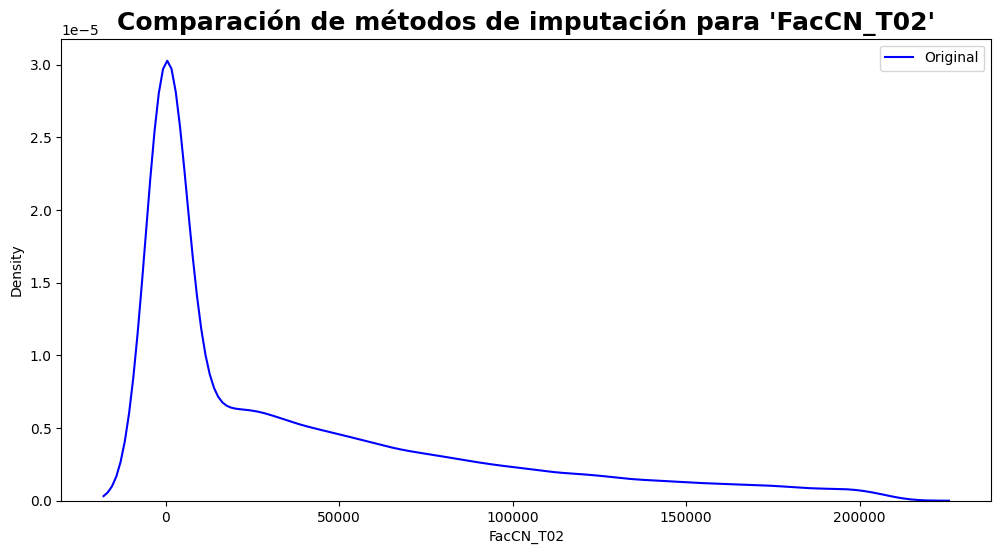

In [120]:
sin_tratamiento(data, "FacCN_T02")

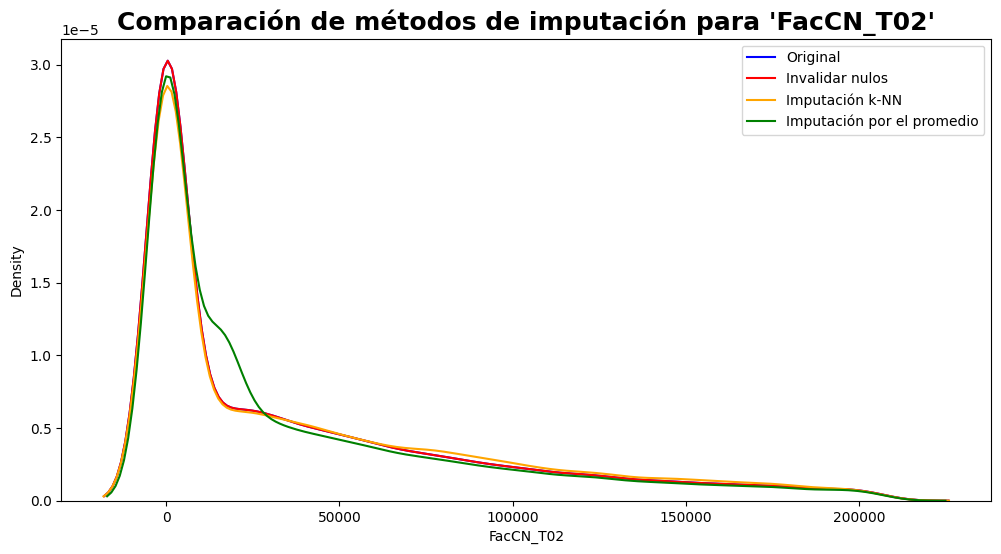

In [121]:
compara_tratamientos(data, data_invalidacion, median_copia, knn_copia, "FacCN_T02")

In [122]:
dfComp = pd.DataFrame([testing_Fac['FacCN_T02'], data_inv_2do12vo['FacCN_T02'], data_knn_2do12vo['FacCN_T02'], data_median_2vo12vo['FacCN_T02']])
dfComp

,count,mean,std,min,25%,50%,75%,max
FacCN_T02,47049.0,39103.74,51378.62,0.0,0.0,15546.0,63522.0,207863.0
FacCN_T02,22472.0,33552.27,45149.62,0.0,0.0,13562.0,52970.0,207840.0
FacCN_T02,51124.0,42022.46,52690.55,0.0,0.0,19912.0,70400.0,207863.0
FacCN_T02,51124.0,37225.99,49699.68,0.0,0.0,15546.0,57970.0,207863.0


#### 3.3.3.2 Mes 12

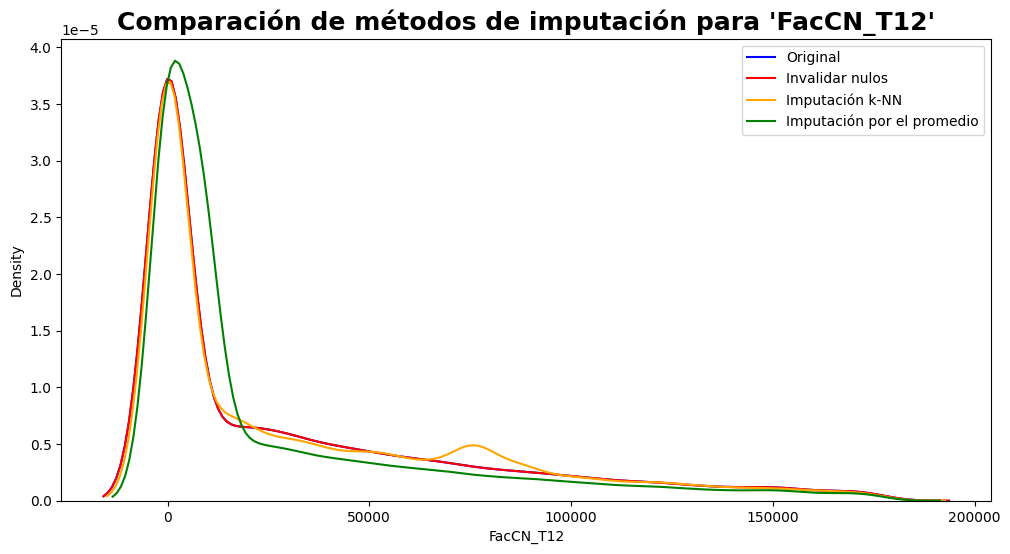

In [123]:
compara_tratamientos(data, data_invalidacion, median_copia, knn_copia, "FacCN_T12")

In [124]:
dfComp = pd.DataFrame([testing_Fac['FacCN_T12'], data_inv_2do12vo['FacCN_T12'], data_knn_2do12vo['FacCN_T12'], data_median_2vo12vo['FacCN_T12']])
dfComp

,count,mean,std,min,25%,50%,75%,max
FacCN_T12,39188.0,31786.98,43835.14,0.0,0.0,8164.0,52317.75,177804.0
FacCN_T12,22472.0,28869.86,39615.65,0.0,0.0,9743.0,46424.25,177705.0
FacCN_T12,51124.0,33430.13,43715.72,0.0,0.0,12350.0,58500.00,177804.0
FacCN_T12,51124.0,26271.68,39658.06,0.0,0.0,8164.0,36000.00,177804.0


#### 3.2.3.3 Conclusiones

De acuerdo al análisis de gráficos, se aprecia de que el valor que más se asemeja al sin tratar es el tratamiento de invalidar nulos. Esto demuestra de que la Data no se ve afectada por invalidar registros enteros por poseer una característica con un valor nulo.

Se podría tomar esta opción como la correcta, sin embargo es necesario hacer testing a la hora de hacer las predicciones para determinar si esta es la mejor opción de tratamiento de nulos para la Data, puesto que aunque no lo parezca en los gráficos, tomar esta alternativa puede generar un sesgo dentro de la Data a raíz de que se están invalidando el resto de datos de los registros.

---

Por otro lado, el cuanto a los datos entregados en tablas...
- El 'mean', el valor más cercano es el entregado en KNN, sin embargo en ambos casos (mes 02 y 12), el mean entregado por KNN se excede
- La desviación estándar que más se acerca a los datos de prueba es el de KNN, donde la diferencia entre los 2 valores resulta mínima
---

Conclusión final

Aunque la invalidación de nulos dentro de los graficos parezca ser la opción correcta, ser tan agresivos dentro de la Data puede provocar sesgos y existe la posibilidad de que los resultados hayan sido de este modo porque el cambio en los datos, al ser graficados, no se pueden notar a simple vista. Esto resulta mucho más evidente cuando se accede a los valores específicos.

Por otro lado, cuando vemos las tablas, vemos que los valores que más se asemejan a la Data de testing es KNN. Por tanto se concluye que, hasta hacer el testing necesario en la fase de modelamiento (4), KNNInputer es la mejor metodología de tratamiento de nulos.

### 3.3.4 Tratamiento Final

Tras el análisis, en este apartado se aplica el tratamiento final escogido para la data.

#### 3.3.4.1 Tratamiento Continua

In [125]:
data[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]] = knn_imputer.fit_transform(data[[f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]])

In [126]:
data[[f'TxsCN_T{str(i).zfill(2)}' for i in range(1, 13)]] = knn_imputer.fit_transform(data[[f'TxsCN_T{str(i).zfill(2)}' for i in range(1, 13)]])

In [127]:
data[[f'ColL1T0_T{str(i).zfill(2)}' for i in range(1, 13)]] = knn_imputer.fit_transform(data[[f'ColL1T0_T{str(i).zfill(2)}' for i in range(1, 13)]])

In [128]:
facCN_cols = [f'FacCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FacCN_T01,0,0.0
FacCN_T02,0,0.0
FacCN_T03,0,0.0
FacCN_T04,0,0.0
FacCN_T05,0,0.0
FacCN_T06,0,0.0
FacCN_T07,0,0.0
FacCN_T08,0,0.0
FacCN_T09,0,0.0
FacCN_T10,0,0.0


In [129]:
facCN_cols = [f'TxsCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
TxsCN_T01,0,0.0
TxsCN_T02,0,0.0
TxsCN_T03,0,0.0
TxsCN_T04,0,0.0
TxsCN_T05,0,0.0
TxsCN_T06,0,0.0
TxsCN_T07,0,0.0
TxsCN_T08,0,0.0
TxsCN_T09,0,0.0
TxsCN_T10,0,0.0


In [130]:
facCN_cols = [f'ColL1T0_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
ColL1T0_T01,0,0.0
ColL1T0_T02,0,0.0
ColL1T0_T03,0,0.0
ColL1T0_T04,0,0.0
ColL1T0_T05,0,0.0
ColL1T0_T06,0,0.0
ColL1T0_T07,0,0.0
ColL1T0_T08,0,0.0
ColL1T0_T09,0,0.0
ColL1T0_T10,0,0.0


#### 3.3.4.2 Tratamiento Discreta

La variable target no posee ningún nulo, sin embargo sus variables independientes sí poseen nulos. Estas necesitan ser tratadas.

In [131]:
data[[f'FlgActCN_T{str(i).zfill(2)}' for i in range(1, 13)]] = knn_imputer.fit_transform(data[[f'FlgActCN_T{str(i).zfill(2)}' for i in range(1, 13)]])

In [132]:
facCN_cols = [f'FlgActCN_T{str(i).zfill(2)}' for i in range(1, 13)]
cant_nulos = data[facCN_cols].isnull().sum()
porc_nulos = round((cant_nulos / len(data)) * 100, 2)

nulos_df = pd.DataFrame({'Nulos': cant_nulos, 'Porcentaje (%)': porc_nulos})
nulos_df

,Nulos,Porcentaje (%)
FlgActCN_T01,0,0.0
FlgActCN_T02,0,0.0
FlgActCN_T03,0,0.0
FlgActCN_T04,0,0.0
FlgActCN_T05,0,0.0
FlgActCN_T06,0,0.0
FlgActCN_T07,0,0.0
FlgActCN_T08,0,0.0
FlgActCN_T09,0,0.0
FlgActCN_T10,0,0.0


## 3.4 Visualización balanceo de clases

In [133]:
def graficar_desbalance_clases(y, etiquetas=None, titulo="Distribución de Clases"):

    # Conteo de las clases
    conteo_clases = pd.Series(y).value_counts().sort_index()

    # Si se proporcionan etiquetas, las asignamos
    if etiquetas:
        conteo_clases.index = etiquetas

    # Crear gráfico
    plt.figure(figsize=(8, 6))
    sb.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="viridis", legend=False)
    plt.title(titulo, fontsize=16)
    plt.xlabel("Clases", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(0, conteo_clases.values.max() * 1.1)  # Un pequeño margen superior
    for i, v in enumerate(conteo_clases.values):
        plt.text(i, v + 0.02 * conteo_clases.values.max(), str(v), ha="center", fontsize=10)
    plt.show()

C:\Users\Claudio C E\AppData\Local\Temp\ipykernel_21400\3300479777.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=conteo_clases.index, y=conteo_clases.values, palette="viridis", legend=False)


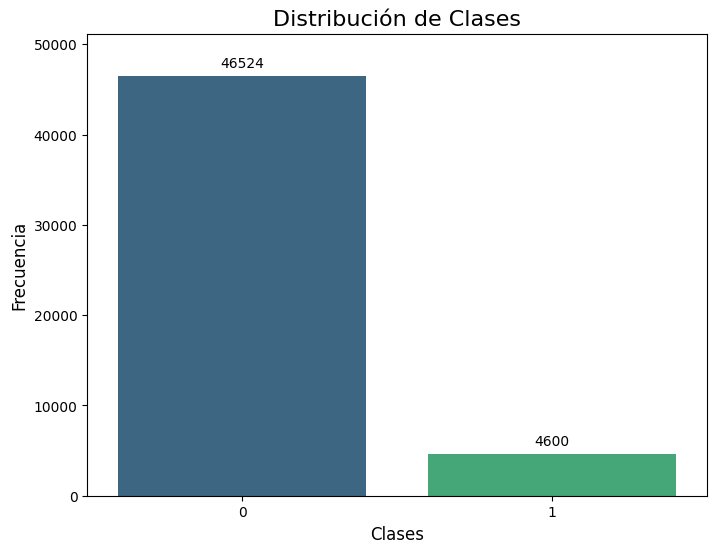

In [134]:
graficar_desbalance_clases(y = data['target'], etiquetas=None, titulo="Distribución de Clases")

In [135]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Celda 1: Definir columnas a escalar
columnas_a_escalar = [
    'TxsCN_T01', 'TxsCN_T02', 'TxsCN_T03',
    'ColL1T0_T05', 'ColL1T0_T06', 'ColL1T0_T07', 'ColL1T0_T08',
    'ColL1T0_T09', 'ColL1T0_T10', 'ColL1T0_T11', 'ColL1T0_T12',
    'FlgActCN_T01', 'FlgActCN_T02', 'FlgActCN_T03',
    'FacCN_T12'
]

data_escalada = data[columnas_a_escalar].copy()

scaler = StandardScaler()
scaler.fit(data_escalada)

# Celda 2: Aplicar escalado y volver a convertir en DataFrame con columnas
data_escalada = pd.DataFrame(
    scaler.transform(data_escalada),
    columns=columnas_a_escalar,
    index=data.index  # esto mantiene los mismos índices que el DataFrame original
)


In [136]:
data_escalada = pd.DataFrame(data_escalada, columns=columnas_a_escalar)

# Se crea primero el objeto Standard Scaler
scaler = StandardScaler()

# Luego "entrenamos" con los datos para obtener los parámetros del escalamiento
scaler.fit(data_escalada)

StandardScaler()

In [137]:
# Finalmente aplicamos el escalamiento
data_escalada = scaler.transform(data_escalada)

In [138]:
data_escalada

array([[-0.61377229, -0.6364044 , -0.65203453, ..., -1.25190709,
        -1.28956804,  0.50462593],
       [-0.32980402, -0.36805014, -0.38325686, ...,  0.79889632,
         0.77551815, -0.31149584],
       [ 0.23813254,  0.70536689, -0.11447919, ...,  0.79889632,
         0.77551815,  2.07066837],
       ...,
       [-0.61377229, -0.36805014, -0.65203453, ...,  0.79889632,
        -1.28956804,  0.74596025],
       [-0.04583574, -0.36805014, -0.38325686, ...,  0.79889632,
         0.77551815,  2.0339764 ],
       [-0.32980402, -0.6364044 , -0.11447919, ..., -1.25190709,
         0.77551815,  0.91203487]], shape=(51124, 15))

In [139]:
columnas = ['TxsCN_T01', 'TxsCN_T02', 'TxsCN_T03',
            'ColL1T0_T05', 'ColL1T0_T06', 'ColL1T0_T07', 'ColL1T0_T08',
            'ColL1T0_T09', 'ColL1T0_T10', 'ColL1T0_T11', 'ColL1T0_T12',
            'FlgActCN_T01', 'FlgActCN_T02', 'FlgActCN_T03', 'FacCN_T12']

data_escalada = pd.DataFrame(data_escalada, columns=columnas)

In [140]:
data_escalada

,TxsCN_T01,TxsCN_T02,TxsCN_T03,ColL1T0_T05,ColL1T0_T06,ColL1T0_T07,ColL1T0_T08,ColL1T0_T09,ColL1T0_T10,ColL1T0_T11,ColL1T0_T12,FlgActCN_T01,FlgActCN_T02,FlgActCN_T03,FacCN_T12
0,-0.613772,-0.636404,-0.652035,-0.426530,-0.082302,-0.108783,0.150704,0.070358,-0.239021,-0.071975,-0.461747,-1.165430,-1.251907,-1.289568,0.504626
1,-0.329804,-0.368050,-0.383257,-0.426530,-0.310623,-0.426182,-0.302755,-0.425621,-0.302993,0.125321,-0.337586,0.858052,0.798896,0.775518,-0.311496
2,0.238133,0.705367,-0.114479,-0.426530,1.022972,1.782496,8.027135,0.403112,-0.146172,0.799284,1.077233,0.858052,0.798896,0.775518,2.070668
3,-0.329804,-0.368050,-0.383257,-0.166637,-0.329091,-0.297444,-0.016237,-0.425621,-0.123333,-0.203112,-0.213424,0.858052,0.798896,0.775518,0.252540
4,2.225910,1.778784,1.498187,0.506112,0.499806,0.085200,0.483936,-0.158050,0.304146,0.698505,0.224568,0.858052,0.798896,0.775518,2.397213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,0.806069,0.705367,0.691854,-0.026474,-0.433906,0.106033,0.131867,0.351556,-0.441161,-0.203420,-0.331377,0.858052,0.798896,0.775518,1.031444
51120,-0.613772,-0.636404,-0.114479,1.252445,-0.148875,-0.032940,-0.291229,-0.425621,-0.441161,-0.451933,-0.461747,-1.165430,-1.251907,0.775518,-0.764724
51121,-0.613772,-0.368050,-0.652035,-0.426530,-0.433906,-0.426182,-0.419703,-0.425621,-0.441161,-0.194563,-0.225964,-1.165430,0.798896,-1.289568,0.745960
51122,-0.045836,-0.368050,-0.383257,-0.173503,-0.006113,0.135275,0.180000,0.238278,-0.441161,-0.451933,-0.192193,0.858052,0.798896,0.775518,2.033976


# Fase 4 - Modelamiento

## 4.1 Modelos de regresión

### 4.1.1 Definición de Variable objetivo

De acuerdo a lo definido dentro del punto 2.2, se definieron las siguientes variables como objetivo...

continua
- FacCN_T99

discreta
- target

Ya que en los resultados de la sección 3.3.2.2 presencia que el més con naturaleza más errática era el mes 12, se tomará la decisión de predecir solo la variable FacCN_T12.

### 4.1.2 Distribución de variable objetivo

In [141]:
data.FacCN_T12.describe()

count     51124.000000
mean      33430.130996
std       43715.717892
min           0.000000
25%           0.000000
50%       12350.000000
75%       58500.000000
max      177804.000000
Name: FacCN_T12, dtype: float64

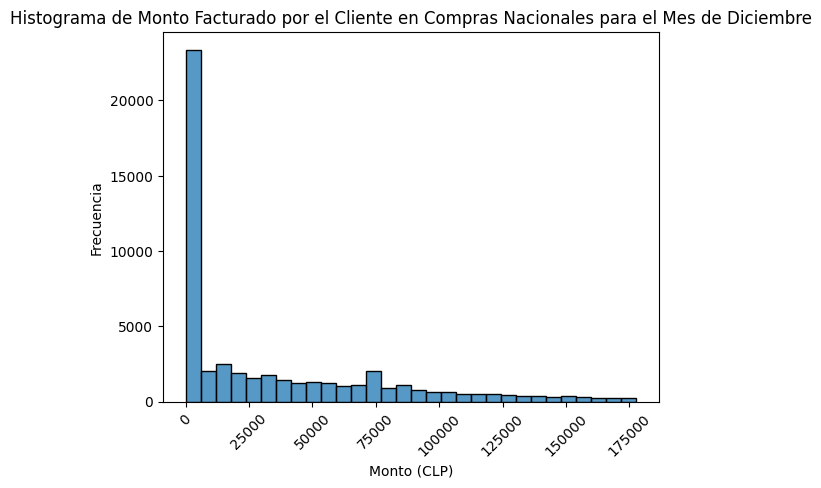

In [142]:
sb.histplot(data=data, x='FacCN_T12', bins=30, kde=False)
plt.title('Histograma de Monto Facturado por el Cliente en Compras Nacionales para el Mes de Diciembre')
plt.xlabel('Monto (CLP)')
plt.ylabel('Frecuencia')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

### 4.1.3 Selección de variables independientes

De acuerdo a lo establecido en el punto 2.3, las variables independientes para cada variable objetivo son las siguientes

variable continua (2.3.1)
- Desde 'ColL1T0_T05' a 'ColL1T0_T10'
- TxsCN_T01 - T03

In [143]:
data_continua = data_escalada[['FacCN_T12', 'TxsCN_T01', 'TxsCN_T02', 'TxsCN_T03', 'ColL1T0_T05', 'ColL1T0_T06', 'ColL1T0_T07', 'ColL1T0_T08', 'ColL1T0_T09', 'ColL1T0_T10', 'ColL1T0_T11', 'ColL1T0_T12']]

In [144]:
# testing top 3 variables independientes de correlación
#data_continua = data_escalada[['FacCN_T12', 'ColL1T0_T06', 'ColL1T0_T07', 'ColL1T0_T08']]

### 4.1.4 Separación datos de entrenamiento y test

#### 4.1.4.1 Variable continua

Se selecciona y divide la data de acuerdo a FacCN_T12

In [145]:
X_cont = data_continua.drop("FacCN_T12", axis=1)
y_cont = data_continua["FacCN_T12"]
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(X_cont, y_cont, test_size=0.2, random_state=19)

### 4.1.5 Algoritmo 1 - `Regresion Polinomial`

#### 4.1.5.1 Creación del modelo

Se incorporan todas las variables independientes

In [146]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_cont)
X_test_poly = poly.transform(X_test_cont)

#### 4.1.5.2 Entrenamiento del modelo

In [147]:
# Paso 4: Entrenamiento
reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train_cont)

LinearRegression()

In [148]:
y_pred_poly = reg_poly.predict(X_test_poly)

#### 4.1.5.3 Evaluación del modelo

En el gráfico se pueden observar que los datos se encuentran concentrados alrededor del cero, y se manifiestan de manera más densa hacia los valores positivos. Esto es dado que los valores previos al escalados son positivos, y en raros casos son valores bajos. De la misma forma, se puede observar la tendencia positiva dentro de la data.

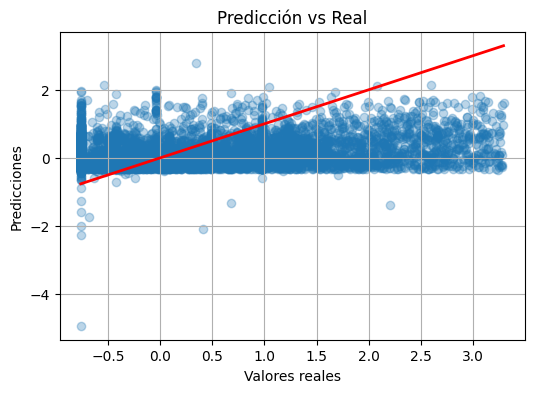

In [149]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test_cont, y_pred_poly, alpha=0.3)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicción vs Real")
plt.plot([y_test_cont.min(), y_test_cont.max()], [y_test_cont.min(), y_test_cont.max()], color='red', lw=2)
plt.grid(True)
plt.show()

#### 4.1.5.4 Cálculo e interpretación de métricas

Para el testing de resultados, se tomarán las métricas resultantes de los 2 casos aplicables. Sean estos el de la elección del top 3 variables de correlación (top 3), y el total de variables independientes escogidas (Total).

También se registrará los cambios en el rendimiento al cambiar los parámetros utilizando el caso que entregue mejores resultados.

##### 4.1.5.4.1 R2

Degree = 2

Top 3: 0.06

Total: 0.16

Utilizando Total, los siguientes "Degree"s entregan los siguientes resultados
- 1 = R2 0.11
- 3 = R2 -0.03

Se determina de que en la medida de que suba a más de 2, la predicción será cada vez peor.

In [150]:
# R2
print('Coefficient of determination: %.2f'
      % r2_score(y_test_cont, y_pred_poly))

Coefficient of determination: 0.16


##### 4.1.5.4.2 MAE

Top 3: 0.94

Total: 0.84

Utilizando Total, los siguientes "Degree"s entregan los siguientes resultados
- 1 = MSE 0.89
- 3 = MSE 1.03

Se determina de que en la medida de que suba a más de 2, la predicción será cada vez peor.

In [151]:
# mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test_cont, y_pred_poly))

Mean squared error: 0.84


In [152]:
lista_resultados_cont = [['reg_poly', r2_score(y_test_cont, y_pred_poly), mean_absolute_error(y_test_cont, y_pred_poly)]]
df_resultados_cont = pd.DataFrame(lista_resultados_cont, columns=['modelo', 'r2score', 'mae'])

### 4.1.6 Algoritmo 2 - `DecisionTreeRegressor`

#### 4.1.6.1 Creación del modelo

In [153]:
# Crea el objeto que representa el modelo de regresión
reg_tree = DecisionTreeRegressor(max_depth=6)

#### 4.1.6.2 Entrenamiento del modelo

In [154]:
# Entrena el modelo con los datos de entrenamiento
reg_tree.fit(X_train_cont, y_train_cont)

DecisionTreeRegressor(max_depth=6)

In [155]:
# Realiza predicciones de los datos de test
y_pred_regtree = reg_tree.predict(X_test_cont)

#### 4.1.6.3 Evaluación del modelo

Se visualiza la profundidad del árbol en sus 6 capas. De ampliarse la imagen (doble click en la imágen) se puede visualizar la cantidad de samples los cuales llegan a las capas más profundas. Estos valores varían desde los 12.897 samples a 2 por ramificación.

Profundidad del árbol: 6


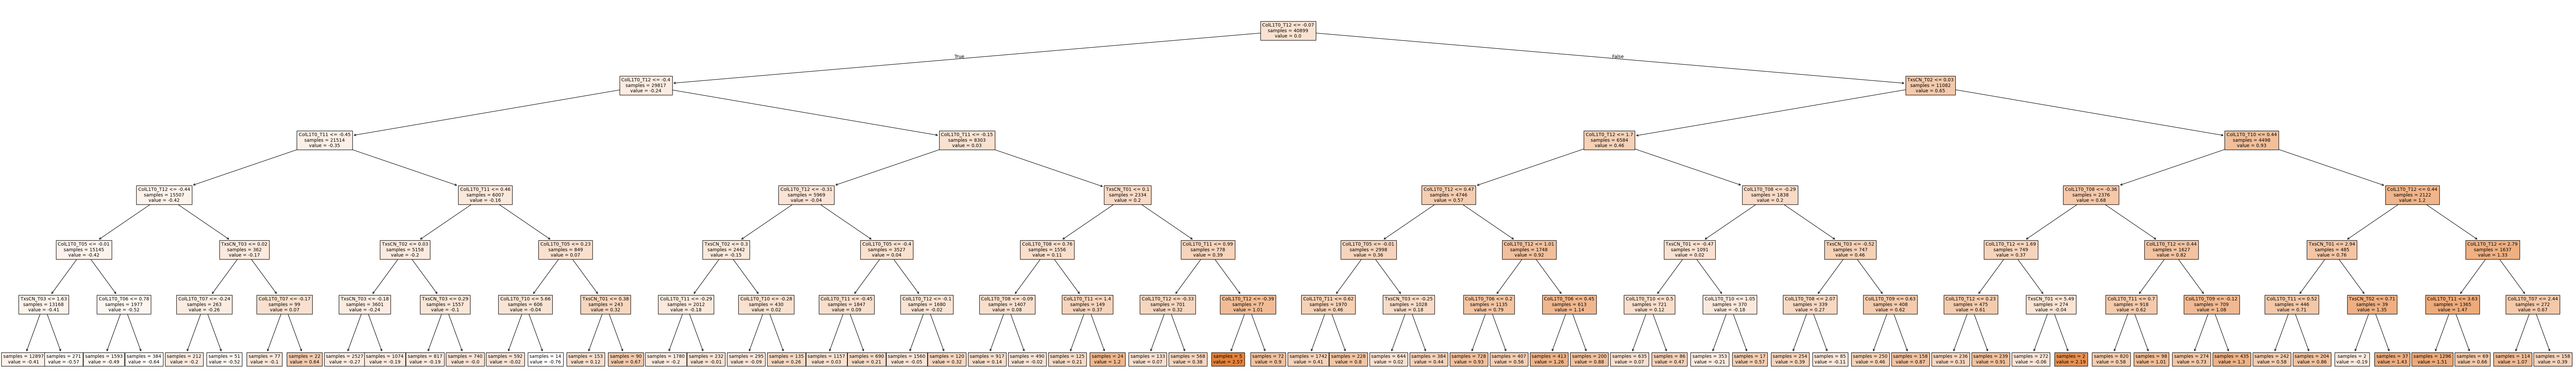

In [156]:
fig, ax = plt.subplots(figsize=(100, 15))
print('Profundidad del árbol:', reg_tree.get_depth())

plot = plot_tree(decision_tree = reg_tree,
      feature_names = X_train_cont.columns,
      filled = True,
      impurity = False,
      fontsize = 10,
      precision = 2,
      ax = ax)

Dada la cantidad de datos, se toma una cantidad reducida de la muestra para analizar su comportamiento.

El sample tomado es de 300 registros, en los cuales se puede visualizar que el modelo tiende a mantenerse cercano al centro de los datos reales, aunque nunca llega a alcanzar los valores altos de la data de testing.

También se observa de que las predicciones, aunque sus valores más bajos se encuentran debajo de 0.0, estos nunca llegan a ser menores a -0.5, en contraste a los valores de testing los cuales llegan más abajo.

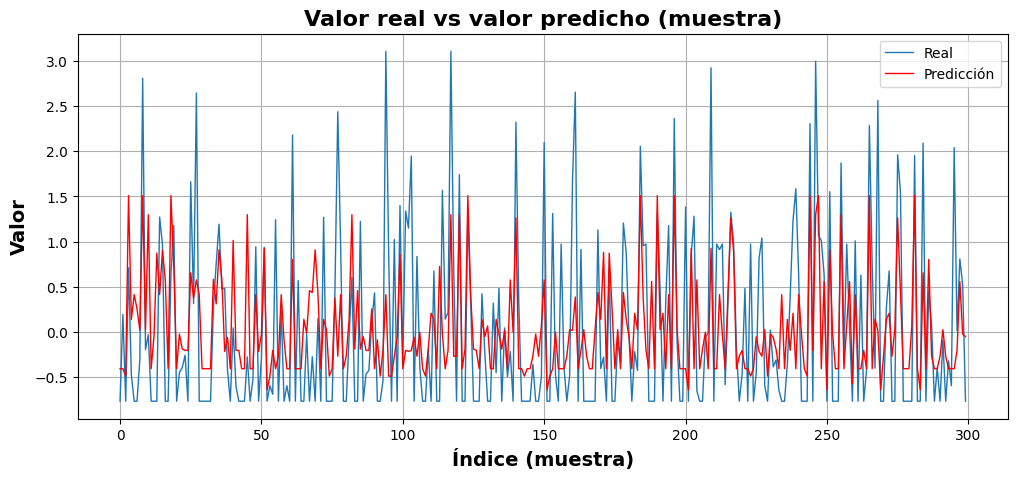

In [157]:
# Tamaño de muestra
sample_size = 300

# Índices aleatorios sin reemplazo
indices = random.sample(range(len(y_test_cont)), sample_size)

# Ordenarlos para que la línea sea suave
indices.sort()

# Crear gráfico
plt.figure(figsize=(12, 5))
plt.plot(np.array(y_test_cont)[indices], label='Real', linewidth=1)
plt.plot(np.array(y_pred_regtree)[indices], label='Predicción', color='red', linewidth=1)

plt.legend()
plt.title('Valor real vs valor predicho (muestra)', fontsize=16, fontweight='bold')
plt.xlabel('Índice (muestra)', fontsize=14, fontweight='bold')
plt.ylabel('Valor', fontsize=14, fontweight='bold')
plt.grid(True)
plt.show()

#### 4.1.6.4 Cálculo e interpretación de métricas

##### 4.1.6.4.1 R2

La baja eficacia del R2 indican de que las variables independientes escogidas no son eficaces con el modelo escogido. En caso de cambiar el parámetro de "max_depth" se observa lo siguiente

Profundidad...
- 3 = 0.23
- 4 = 0.25
- 5 = 0.25
- 6 = 0.26
- 7 = 0.25
- 8 = 0.24
- 9 = 0.23

De acuerdo a los resultados se determina utilizar una profundidad de 6, ya que esta es la que presenta mejor coeficiente de determinación.

In [158]:
# R2
print('Coefficient of determination: %.2f'
      % r2_score(y_test_cont, y_pred_regtree))

Coefficient of determination: 0.26


##### 4.1.6.4.2 MAE

De acuerdo a los resultados se concluye de que hay un gran porcentaje de error (65%), el cual muestra la poca precisión del modelo.

Profundidad...
- 3 = 0.67
- 4 = 0.66
- 5 = 0.66
- 6 = 0.65
- 7 = 0.65
- 8 = 0.65
- 9 = 0.65

Las profundidades desde 6 hasta 9 poseen el mismo valor, por tanto todas estas son óptimas ocuparlas.

In [159]:
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test_cont, y_pred_regtree))

Mean absolute error: 0.65


Guardar resultados

In [160]:
resultado = {'modelo': 'reg_tree', 'r2score': r2_score(y_test_cont, y_pred_regtree), 'mae': mean_absolute_error(y_test_cont, y_pred_regtree)}
df_resultados_cont.loc[len(df_resultados_cont)] = resultado
#df_resultados_cont = df_resultados_cont.append(lista_resultados_cont)

### 4.1.7 Comparación de los modelos

De acuerdo a las métricas, podemos ver de que el modelo con mejor rendimiento es Regression Tree, el cual se impone por sobre Regression Polinomial no solo por su rendimiento como modelo, sino además en su índice de error absoluto

In [161]:
df_resultados_cont

,modelo,r2score,mae
0,reg_poly,0.161327,0.721149
1,reg_tree,0.255219,0.651562


## 4.2 Modelo de clasificación

### 4.2.1 Distribución de variable objetivo

La variable no presenta datos faltantes. Posee solo dos valores únicos, 0 y 1, por lo cual se le considera una variable binaria. Su valor con mayor recurrencia dentro del conjunto es 0, con una frecuencia de 110316 registros. Con esto se concluyó que, en la mayoría de las predicciones fue indicado que los clientes no pagan en su totalidad la tarjeta de crédito.

In [162]:
data_target = data.copy()
data_target.target = data_target['target'].astype('object')

In [163]:
data_target.target.describe()

count     51124
unique        2
top           0
freq      46524
Name: target, dtype: int64

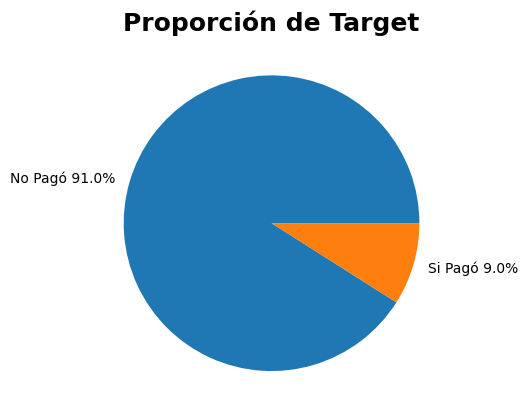

In [164]:
#Contando registros
clases = np.array([data[data.target == 0].shape[0],
                   data[data.target == 1].shape[0]])

#Creando las leyendas del gráfico
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%'  for x in clases ]
labels[0] = 'No Pagó ' + labels[0]
labels[1] = 'Si Pagó ' + labels[1]

plt.pie(clases, labels=labels)
plt.title('Proporción de Target', fontsize=18, fontweight="bold")
plt.show()

### 4.2.2 Selección de variables independientes

variable discreta (2.3.2)
- FlgActCN_T01 hasta a FlgActCN_T03, como variable independiente negativa

In [165]:
# selecciona la data como arriba de la variable discreta
data_discreta = data_escalada[['FlgActCN_T01', 'FlgActCN_T02', 'FlgActCN_T03']]
data_discreta = data_discreta.assign(target = data.target)

In [166]:
data_discreta

,FlgActCN_T01,FlgActCN_T02,FlgActCN_T03,target
0,-1.165430,-1.251907,-1.289568,0
1,0.858052,0.798896,0.775518,0
2,0.858052,0.798896,0.775518,0
3,0.858052,0.798896,0.775518,0
4,0.858052,0.798896,0.775518,0
...,...,...,...,...
51119,0.858052,0.798896,0.775518,0
51120,-1.165430,-1.251907,0.775518,0
51121,-1.165430,0.798896,-1.289568,0
51122,0.858052,0.798896,0.775518,0


### 4.2.3 Separación datos entrenamiento y test

In [167]:
X_dis = data_discreta.drop("target", axis=1)
y_dis = data_discreta["target"]
X_train_dis, X_test_dis, y_train_dis, y_test_dis = train_test_split(X_dis, y_dis, test_size=0.2, random_state=2, stratify=y_dis)

In [168]:
#Ver distribución original,
print("Antes del rebalanceo:", Counter(y_train_dis))

#Inicializar SMOTETomek,
smt = SMOTETomek(random_state=42)

#Aplicar a los datos de entrenamiento,
X_train_res, y_train_res = smt.fit_resample(X_train_dis, y_train_dis)

#Ver distribución después del rebalanceo,
print("Después de SMOTETomek:", Counter(y_train_res))

Antes del rebalanceo: Counter({0: 37219, 1: 3680})
Después de SMOTETomek: Counter({0: 37219, 1: 37219})


### 4.2.4 Algoritmo 1 - DecisionTreeClassifier

#### 4.2.4.1 Creación del modelo

In [169]:
# Crea el objeto que representa el modelo de clasificación
class_tree = DecisionTreeClassifier(max_depth=5)

#### 4.2.4.2 Entrenamiento del modelo

In [170]:
# Se entrena el modelo de clasificación
class_tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5)

In [171]:
# Realiza predicciones de los datos de test
y_predicted_tree = class_tree.predict(X_test_dis)

#### 4.2.4.3 Evaluación del modelo

De acuerdo a la representación gráfica del árbol, se puede concluir lo siguiente...
- La profundidad mínima para resolver target se encuentra con True, con una profundidad de 3 capas
- La profundidad máxima se encuentra en las 5 capas. Aunque, pese a que ésta sea la máxima, solo una de las ramificaciones llega a esta profunidad, y esta se encuentra en False
- La mayoría de las ramificaciones necesitan 4 capas para ser resuelta

Profundidad del árbol: 5


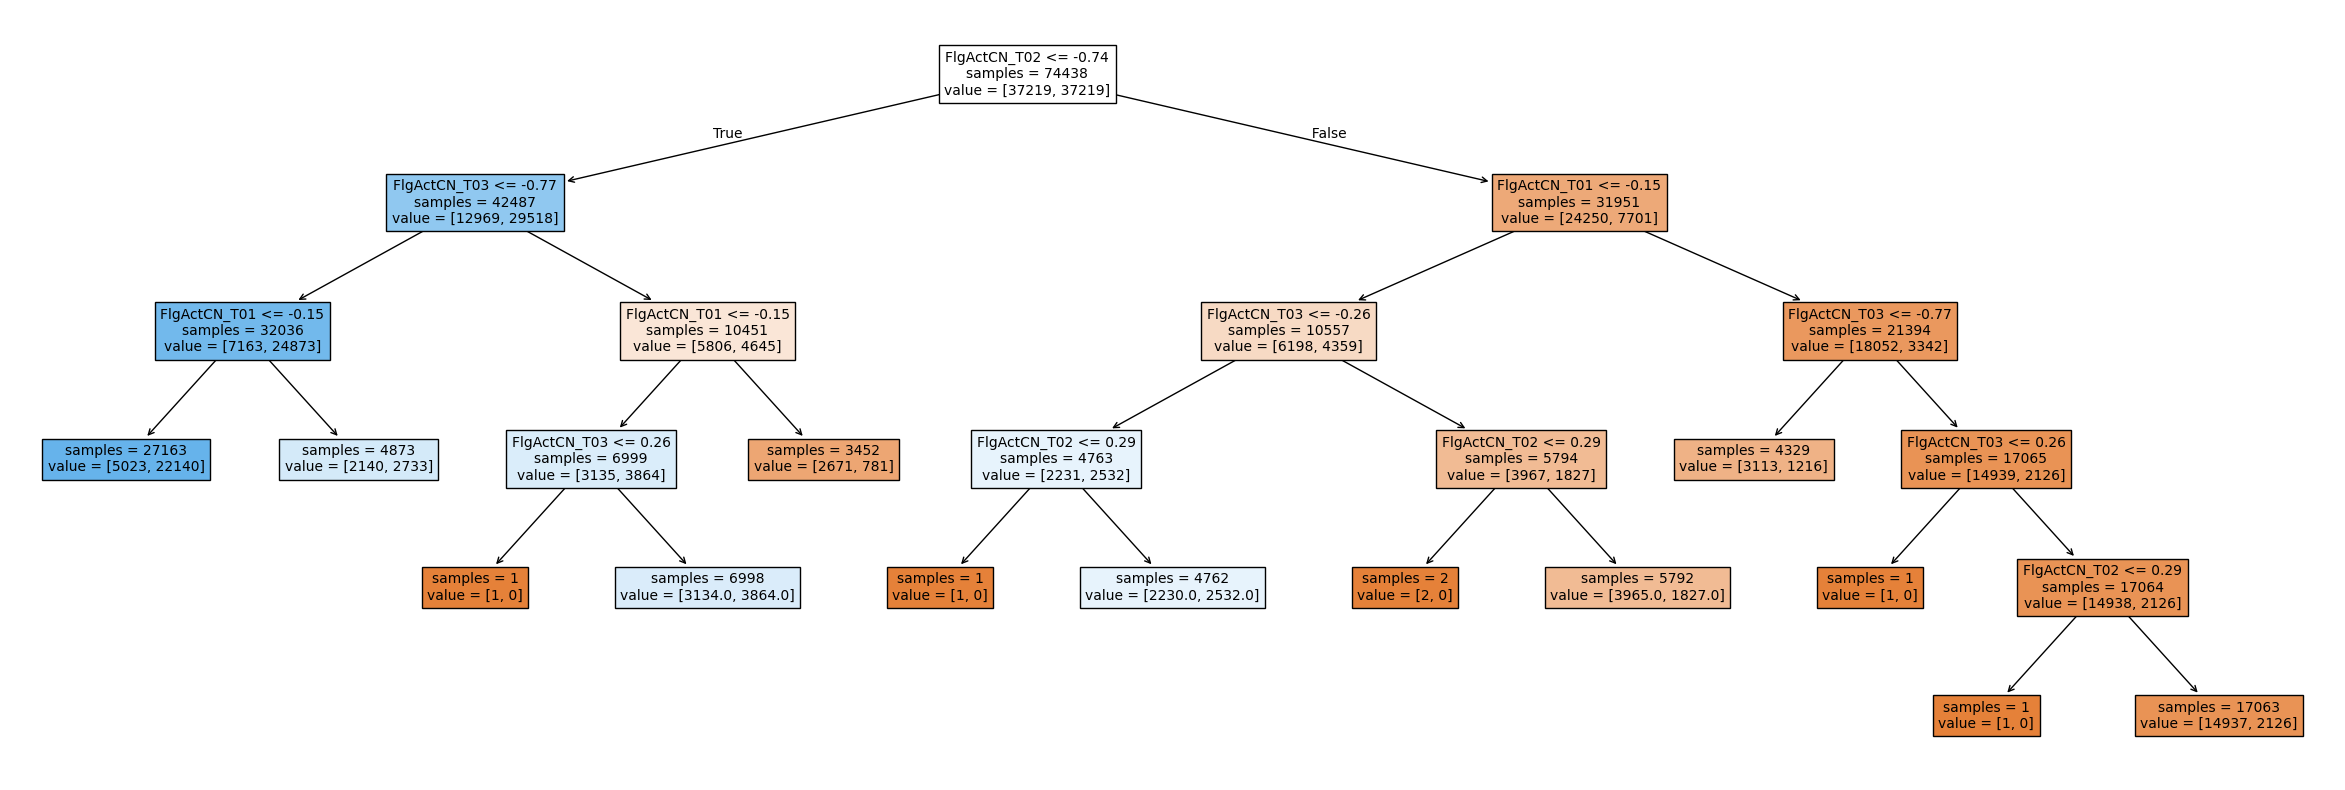

In [172]:
fig, ax = plt.subplots(figsize=(30, 10))
print('Profundidad del árbol:', class_tree.get_depth())

plot = plot_tree(decision_tree = class_tree,
      feature_names = X_train_res.columns,
      filled = True,
      impurity = False,
      fontsize = 10,
      precision = 2,
      ax = ax)

#### 4.2.4.4 Cálculo e interpretación de métricas

##### 4.2.4.4.1 Matriz de confusión

El modelo Decision Tree Classifier logra detectar con una tasa de acierto del 60.14% clientes que no pagan completamente la tarjeta. También clasifica correctamente en un 7.52% a los que sí pagan. Por otro lado, en un 30.87% de los casos se detectan como no pago a aquellos que sí pagan, mientras que en un 1.48% de los casos se detecta como no pagadores a quienes sí pagan.

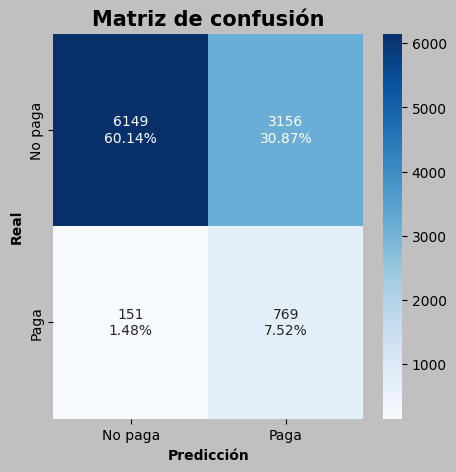

In [173]:
plt.figure(figsize=(5,5),facecolor= 'silver')
clases = ["No paga", "Paga"]
matriz = confusion_matrix(y_test_dis, y_predicted_tree)
matriz_x = np.array(matriz)
group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten()/matriz_x.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción", fontsize=10, fontweight="bold")
plt.ylabel("Real", fontsize=10, fontweight="bold")
plt.show()

##### 4.2.4.4.2 Accuracy

La precisión entrega un 68% de acierto. Pese a ser un valor alto, y considerando los resultados de la matriz de confusión, se puede concluir de que el modelo puede entregar resultados engañosos.

In [174]:
print('Precisión: %.2f'
      % accuracy_score(y_test_dis, y_predicted_tree))

Precisión: 0.68


#### 4.2.4.5 Aplicación de `CrossValidation`

Por clase:

No Pagó (clase 0): Hay una muy alta precisión y un alto recall, por lo que el modelo identifico la gran mayoría de valores reales positivos sin embargo no detectó con la misma certeza todos los reales positivos y falsos negativos.

Pagó (clase 1): Hay una alta precisión y un muy alto recall por lo que el modelo no identificó muy bien los reales positivos pero identificó con buena certeza los casos reales positivos y falsos negativos.

In [175]:
print(classification_report(y_test_dis, class_tree.predict(X_test_dis), zero_division=0.0))

              precision    recall  f1-score   support

           0       0.98      0.66      0.79      9305
           1       0.20      0.84      0.32       920

    accuracy                           0.68     10225
   macro avg       0.59      0.75      0.55     10225
weighted avg       0.91      0.68      0.75     10225



#### 4.2.4.6 Análisis de métricas usando `CrossValidation`

In [176]:
scores = cross_val_score(class_tree, X_train_dis, y_train_dis, cv=5)
print(scores)

print("{0:<25} : {1:.2f}".format("El promedio es", np.mean(scores)))
print("{0:<25} : {1:.2f}".format("La desviacion estandar es", np.std(scores) ))

[0.91002445 0.91002445 0.91002445 0.91002445 0.91001345]
El promedio es            : 0.91
La desviacion estandar es : 0.00


In [177]:
print("{0:<25} : {1:.2f}".format("El promedio es", np.mean(scores)))
print("{0:<25} : {1:.2f}".format("La desviacion estandar es", np.std(scores) ))

El promedio es            : 0.91
La desviacion estandar es : 0.00


### 4.2.5 Algoritmo 2 - Random Forest Classifier

#### 4.2.5.1 Creación del modelo

In [178]:
ran_for = RandomForestClassifier(random_state=42)

#### 4.2.5.2 Entrenamiento del modelo

In [179]:
ran_for.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [180]:
y_pred_ranfor = ran_for.predict(X_test_dis)

#### 4.2.5.3 Evaluación del modelo

De acuerdo a la representación gráfica del árbol, se puede concluir lo siguiente...
- La mayoría de ramificaciones finalizan en la capa 3 y en la 4, lo cual indica de que el árbol de decisiones es rápido al realizar predicciones
- La ramificación con mayor profundidad alcanzó la capa 5, a la cual llegan 10.776 samples

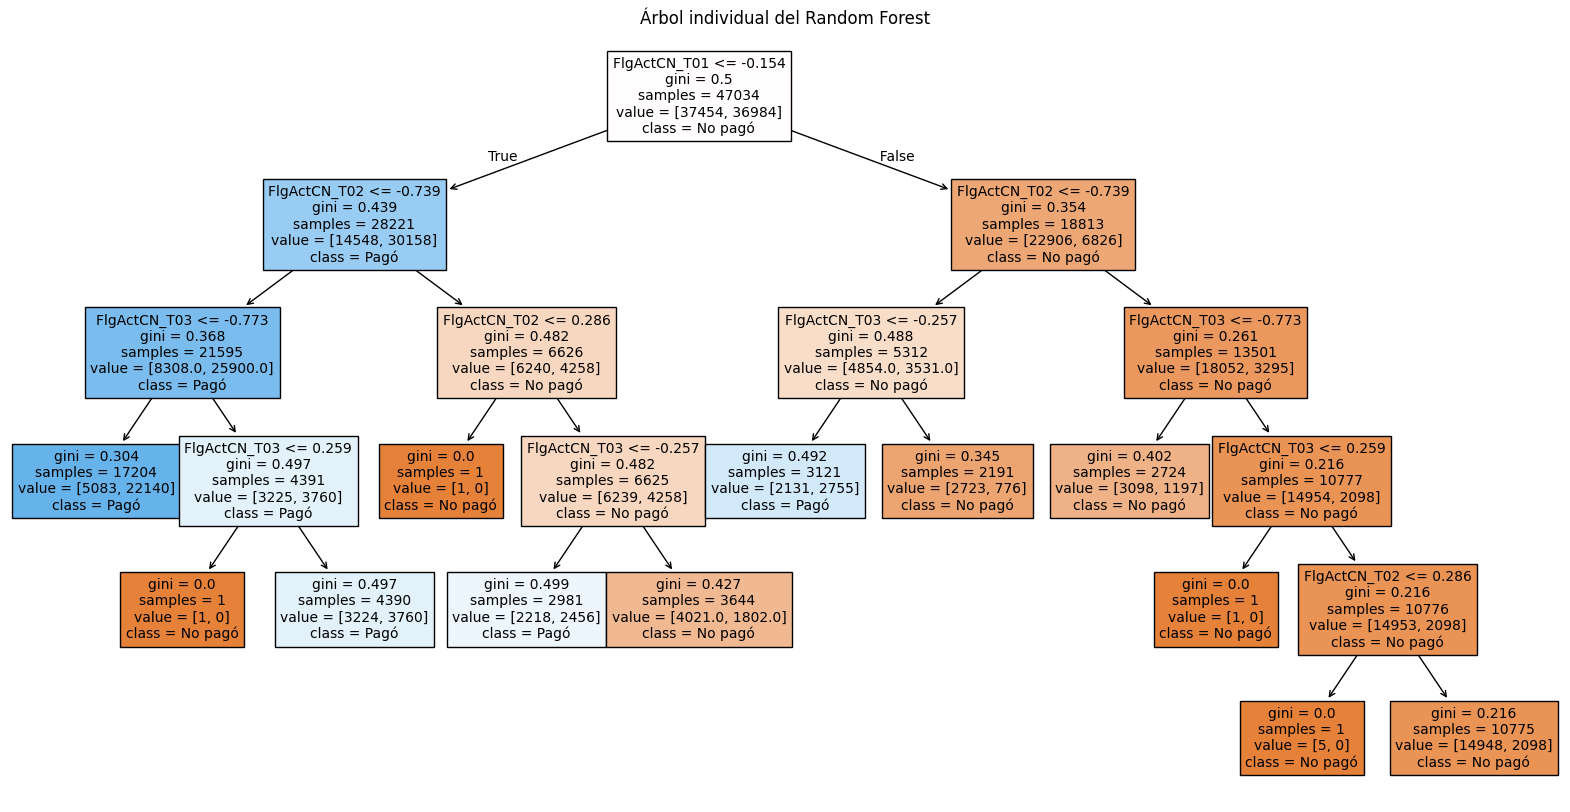

In [181]:
# Graficar uno de los árboles del bosque (el primero)
plt.figure(figsize=(20, 10))
plot_tree(ran_for.estimators_[0],
          feature_names=X_train_res.columns,
          class_names=['No pagó', 'Pagó'],
          filled=True,
          max_depth=9,  # puedes cambiar esto para no mostrar árboles gigantes
          fontsize=10)
plt.title("Árbol individual del Random Forest")
plt.show()

#### 4.2.5.4 Cálculo e interpretación de métricas

##### 4.2.5.4.1 Matriz de confusión

El modelo RandomForestClassifier muestra una alta capacidad para detectar a los clientes que no pagan completamente la tarjeta, con una tasa de acierto del 60.14% en esa clase. También identifica correctamente al 7.52% de los que sí pagan. Sin embargo, comete errores al clasificar al 30.87% de los pagadores como si no pagaran, y al 1.48% de los no pagadores como si pagaran.

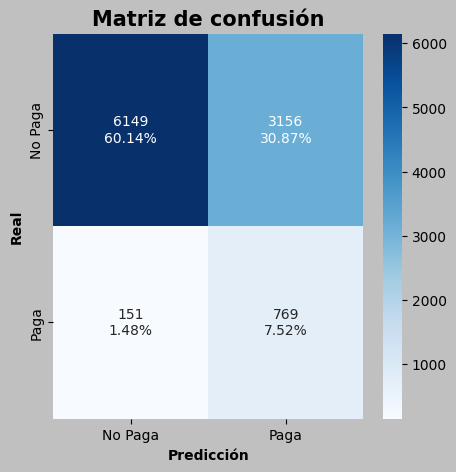

In [182]:
plt.figure(figsize=(5,5),facecolor= 'silver')
clases = ["No Paga", "Paga"]
matriz = confusion_matrix(y_test_dis, y_pred_ranfor)
matriz_x = np.array(matriz)
group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten()/matriz_x.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción", fontsize=10, fontweight="bold")
plt.ylabel("Real", fontsize=10, fontweight="bold")
plt.show()

##### 4.2.5.4.2 Accuracy

El modelo RandomForestClassifier logró predecir correctamente el valor de los clientes que no y si pagan completamente la tarjeta, en un 68% de los casos. 

In [183]:
print('Accuracy: %.2f'
      % accuracy_score(y_test_dis, y_pred_ranfor))

Accuracy: 0.68


#### 4.2.5.5 Aplicación de `CrossValidation`

Por clase:

No Pagó (clase 0): Hay una alta precisión y recall por lo que el modelo identifica bien a los que no pagan.

Pagó (clase 1): Hay una alta precisión y recall por lo que el modelo identifica bien a los que pagan.

In [185]:
print(classification_report(y_test_dis, y_pred_ranfor, target_names = ['No Pagó', 'Pagó'], zero_division=0.0))

              precision    recall  f1-score   support

     No Pagó       0.98      0.66      0.79      9305
        Pagó       0.20      0.84      0.32       920

    accuracy                           0.68     10225
   macro avg       0.59      0.75      0.55     10225
weighted avg       0.91      0.68      0.75     10225



#### 4.2.5.6 Análisis de métricas usando `CrossValidation`

In [186]:
scores = cross_val_score(ran_for, X_train_res, y_train_res, cv=5)
print(scores)
print("{0:<25} : {1:.2f}".format("El promedio es", np.mean(scores)))
print("{0:<25} : {1:.2f}".format("La desviacion estandar es", np.std(scores) ))

[0.75416443 0.74959699 0.75235089 0.75011755 0.75260294]
El promedio es            : 0.75
La desviacion estandar es : 0.00


### 4.2.6 Algoritmo 3 - SVM

Se prepara la Data aparte de la preparación incial ya que es necesario hacer un tratamiento a la data escalada.

In [187]:
# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dis)
X_test_scaled = scaler.transform(X_test_dis)
# Aplicar SMOTETomek al conjunto escalado
smt = SMOTETomek(random_state=42)
X_train_res_esc, y_train_res_esc = smt.fit_resample(X_train_scaled, y_train_dis)

#### 4.2.6.1 Creación del modelo

In [188]:
# Crea un objeto de SVM. Importante es el parámetro "kernel"
svc_model = SVC(kernel='rbf', random_state=42)

#### 4.2.6.2 Entrenamiento del modelo

In [189]:
svc_model.fit(X_train_res_esc, y_train_res_esc)

SVC(random_state=42)

In [190]:
# Realiza la predicción con los datos de test
y_pred_svc = svc_model.predict(X_test_scaled)

#### 4.2.6.3 Evaluación del modelo

Se visualiza la separación de la data en al forma en la que el kernel 'rbf' trabaja. Se toma esta opción dada la flexibilidad que ofrece el parámetro para capturar la Data.

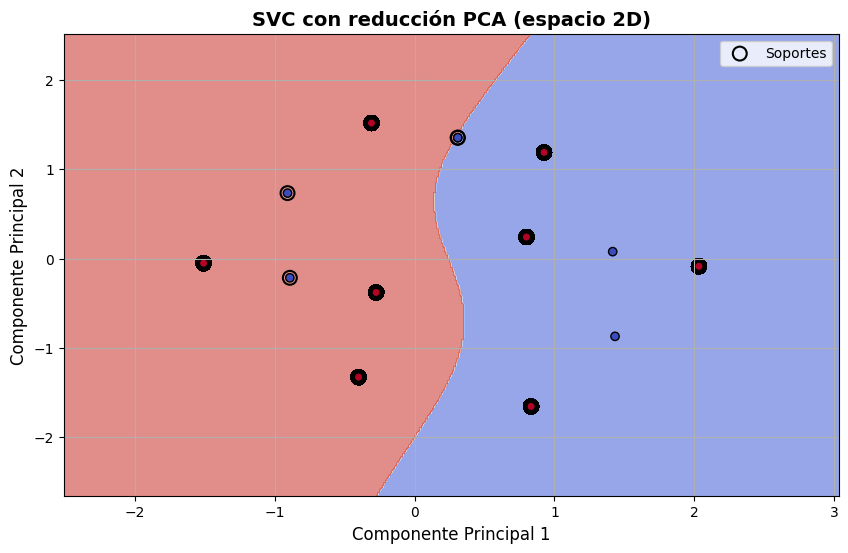

In [191]:
# 1. Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_res_esc)

# 2. Volver a entrenar el modelo en el espacio reducido para visualizar frontera
svc_pca_model = SVC(kernel='rbf', random_state=42)
svc_pca_model.fit(X_pca, y_train_res_esc)

# 3. Visualización
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svc_pca_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_res_esc, cmap=plt.cm.coolwarm, edgecolors='k')

# Vectores de soporte
plt.scatter(svc_pca_model.support_vectors_[:, 0],
            svc_pca_model.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidths=1.5, label='Soportes')

plt.title('SVC con reducción PCA (espacio 2D)', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### 4.2.6.4 Cálculo e interpretación de métricas

##### 4.2.6.4.1 Matriz de confusión

El modelo de Super Vector Machine muestra, como los otros algoritmos, una alta capacidad para detectar clientes que no pagan completamente la tarjeta. Su tasa de acierto es de un 60.13%. Por otro lado, detecta correctamente en un 7.52% los casos correctos de paga. Sin embargo se detecta erróneamente en un 30.88% de los casos se registran casos de no paga como paga. Se comete errores al clasificar pagas como no pagas en un 1.48%.

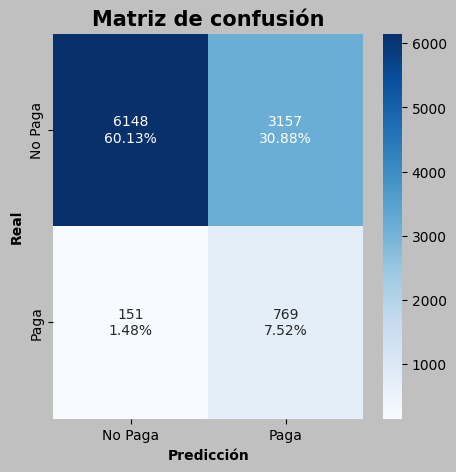

In [192]:
plt.figure(figsize=(5,5),facecolor= 'silver')
clases = ["No Paga", "Paga"]
matriz = confusion_matrix(y_test_dis, y_pred_svc)
matriz_x = np.array(matriz)
group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten()/matriz_x.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción", fontsize=10, fontweight="bold")
plt.ylabel("Real", fontsize=10, fontweight="bold")
plt.show()

##### 4.2.6.4.2 Accuracy

In [193]:
print('Coefficient of determination: %.2f'
      % accuracy_score(y_test_dis, y_pred_svc))

Coefficient of determination: 0.68


#### 4.2.6.5 Aplicación de `CrossValidation`

Por clase:

No Pagó (clase 0): Hay una muy alta precisión y un alto recall, por lo que el modelo identifico la gran mayoría de valores reales positivos sin embargo no detectó con la misma certeza todos los reales positivos y falsos negativos.

Pagó (clase 1): Hay una alta precisión y un muy alto recall por lo que el modelo no identificó muy bien los reales positivos pero identificó con buena certeza los casos reales positivos y falsos negativos.

In [194]:
print(classification_report(y_test_dis, y_pred_svc, target_names = ['No Pagó', 'Pagó'], zero_division=0.0))

              precision    recall  f1-score   support

     No Pagó       0.98      0.66      0.79      9305
        Pagó       0.20      0.84      0.32       920

    accuracy                           0.68     10225
   macro avg       0.59      0.75      0.55     10225
weighted avg       0.91      0.68      0.75     10225



#### 4.2.6.6 Análisis de métricas usando `CrossValidation`

In [195]:
scores = cross_val_score(svc_model, X_train_dis, y_train_dis, cv=5)
print(scores)

print("{0:<25} : {1:.2f}".format("El promedio es", np.mean(scores)))
print("{0:<25} : {1:.2f}".format("La desviacion estandar es", np.std(scores) ))

[0.91002445 0.91002445 0.91002445 0.91002445 0.91001345]
El promedio es            : 0.91
La desviacion estandar es : 0.00


### 4.2.7 Algoritmo 4 - KNN

#### 4.2.7.1 Creación del modelo

In [196]:
knc_model = KNeighborsClassifier(n_neighbors=3)

#### 4.2.7.2 Entrenamiento del modelo

In [197]:
knc_model.fit(X_train_res_esc, y_train_res_esc)

KNeighborsClassifier(n_neighbors=3)

In [199]:
y_pred_knc = knc_model.predict(X_test_dis)

C:\Users\Claudio C E\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


#### 4.2.7.3 Evaluación del modelo

El gráfico muestra de que el rendimiento no mejora ni empeora después de 9 "neighbours". Además, solo los valores 5, 7 y 9 empeoran el rendimiento del modelo (0.84), mientras que el resto todos comparten y poseen mejor rendimiento, el cual es de 0.91.

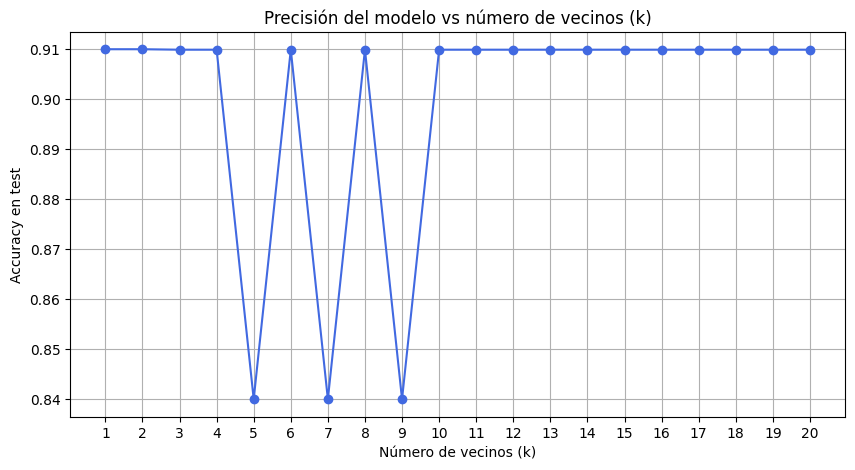

In [200]:
# Probar distintos valores de k
k_vals = range(1, 21)
scores = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res_esc, y_train_res_esc)
    y_pred_k = knn.predict(X_test_scaled)  # X_test_dis fue escalado a X_test_scaled
    scores.append(accuracy_score(y_test_dis, y_pred_k))

# Graficar
plt.figure(figsize=(10,5))
plt.plot(k_vals, scores, marker='o', linestyle='-', color='royalblue')
plt.title("Precisión del modelo vs número de vecinos (k)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Accuracy en test")
plt.grid(True)
plt.xticks(k_vals)
plt.show()


#### 4.2.7.4 Cálculo e interpretación de métricas

##### 4.2.7.4.1 Matriz de confusión

El modelo KNeighborsClassifier muestra una alta capacidad para detectar a los clientes que no pagan completamente la tarjeta, con una tasa de acierto del 90.99% en esa clase. Pero no es capaz de identificar correctamente a los que sí pagan. Comete errores al clasificar al 9% de los pagadores como si no pagaran, y reconoce con valores no superiores a un 0.01% a los no pagadores como si pagaran.

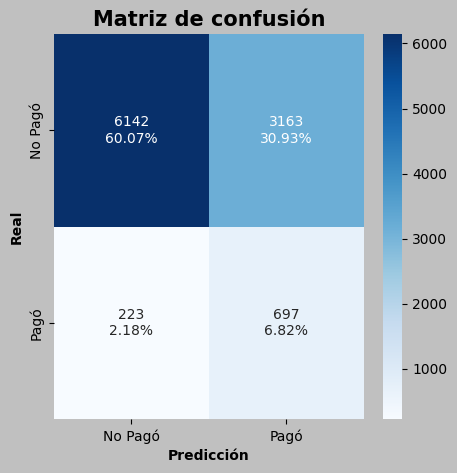

In [201]:
plt.figure(figsize=(5,5),facecolor= 'silver')
clases = ["No Pagó", "Pagó"]
matriz = confusion_matrix(y_test_dis, y_pred_knc)
matriz_x = np.array(matriz)
group_counts = ["{0:0.0f}".format(value) for value in matriz_x.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matriz_x.flatten()/matriz_x.sum()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
plt.title("Matriz de confusión", fontsize=15, fontweight="bold")
plt.xlabel("Predicción", fontsize=10, fontweight="bold")
plt.ylabel("Real", fontsize=10, fontweight="bold")
plt.show()

##### 4.2.7.4.2 Accuracy

El modelo KNeighborsClassifier logró predecir correctamente el valor de los clientes que no y si pagan completamente la tarjeta, en un 91% de los casos.

In [202]:
print('Coefficient of determination: %.2f'
      % accuracy_score(y_test_dis, y_pred_knc))

Coefficient of determination: 0.67


#### 4.2.7.5 Aplicación de `CrossValidation`

Por clase:

No Pagó (clase 0): Hay una alta precisión y recall por lo que el modelo identifica bien a los que no pagan.

Pagó (clase 1): Recall bajo por lo que el modelo falla en detectar muchos que sí pagan.

In [203]:
print(classification_report(y_test_dis, y_pred_knc, target_names = ['No Pagó', 'Pagó'], zero_division=0.0))

              precision    recall  f1-score   support

     No Pagó       0.96      0.66      0.78      9305
        Pagó       0.18      0.76      0.29       920

    accuracy                           0.67     10225
   macro avg       0.57      0.71      0.54     10225
weighted avg       0.89      0.67      0.74     10225



#### 4.2.7.6 Análisis de métricas usando `CrossValidation`

In [204]:
scores = cross_val_score(knc_model, X_train_dis, y_train_dis, cv=5)
print(scores)

print("{0:<25} : {1:.2f}".format("El promedio es", np.mean(scores)))
print("{0:<25} : {1:.2f}".format("La desviacion estandar es", np.std(scores) ))

[0.91002445 0.91002445 0.91002445 0.91002445 0.91001345]
El promedio es            : 0.91
La desviacion estandar es : 0.00


### 4.2.8 Comparación de los modelos

In [205]:
modelos = {
    "Decision Tree": class_tree,
    "Random Forest": ran_for,
    "SVC": svc_model,
    "KNN": knc_model
}

#Lista para almacenar resultados,
resultados = []

#Comparación automática,
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test_dis)

    resultados.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test_dis, y_pred),
        "Recall": recall_score(y_test_dis, y_pred),
        "F1-score": f1_score(y_test_dis, y_pred)
    })

#Convertir a DataFrame,
df_comparacion = pd.DataFrame(resultados).sort_values(by="F1-score", ascending=False)
print(df_comparacion)

C:\Users\Claudio C E\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\Claudio C E\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


          Modelo  Accuracy    Recall  F1-score
0  Decision Tree  0.676577  0.835870  0.317441
1  Random Forest  0.676577  0.835870  0.317441
2            SVC  0.676479  0.835870  0.317375
3            KNN  0.668851  0.757609  0.291632


Debido que las clases están desbalanceadas, Accuracy puede resultar engañosa, ya que un modelo que predice solo la clase mayoritaria puede tener una precisión alta pero su rendimiento puede ser pobre en la clase minoritaria (los que no pagan).

Por esta razón, se utilizó el F1-score como métrica principal de evaluación, porque representa un equilibrio entre precision que evita falsos positivos y recall que detecta correctamente a los que no pagan, y ambas son importantes en este caso.

El modelo SVC obtuvo el mejor F1-score entre los modelos que se evaluaron, lo cual indica que logra un mejor equilibrio general al identificar correctamente a los clientes que no pagan sin generar un exceso de falsos positivos. Esto lo convierte en la opción más adecuada para este caso, donde se busca minimizar riesgos financieros sin afectar injustamente a clientes que sí cumplen con sus pagos.